## Phase Two Project Submission

* Student name: Eva Mizer
* Student pace: self paced
* Scheduled project review date/time: TBD
* Instructor name: Morgan Jones
* Blog post URL: https://github.com/evamizer/phase-2-project


# Part 1: Overview and Data Understanding


## Objective:

### Want to flip houses or just make more profit selling your own future home?

Well, there is still a simple way to get started - by knowing what to look for in a potential flip that will give you the biggest bang for your buck! 

In this notebook, we will explore how different aspects of a home can affect it's value. We will focus on aspects such as number of bedrooms and bathrooms, the square footage of the living space, and time of year the home sold. 

We will use heatmaps to assess initial correlation, then narrow down our data to the items that have the highest correlation, focusing on things that are most controllable within a set property. 


### Gameplan
1. **Data Overview** - *Look at correlations between price and other factors and decide which groups we want to work with*
2. **Data Cleanup** - *Change data types, use dummies, and get rid of any extreme outliers as needed*
3. **Data analysis** - *Make a baseline model, drop outliers and otherwise tweak our data to improve the efficiency of our models, and do some basic visuals and analysis*
4. **Results and recommendations** - *Delivery results and recommendations in an easily digestible manner*


## Data Understanding:

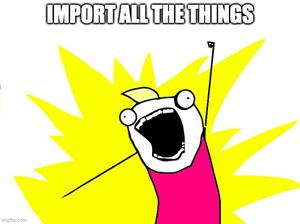

In [1]:
### Import all the goods
import pandas as pd #to work with dataframes
import numpy as np #for any and all calculations

#Linear Regression Goods

import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import statsmodels.api as sm #for regression models and such
from sklearn.model_selection import train_test_split #Training and testing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression #
from sklearn.linear_model import LinearRegression #
import sklearn.metrics as metrics
from sklearn.feature_selection import RFECV
from sklearn import model_selection, preprocessing #see which elements are really pulling their weight
import xgboost as xgb #to rev up our data and find what really is pulling its own weight

import seaborn as sns#make all the pretty things!

#To ignore those pesky warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data Description: Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

In [2]:
# check info on columns/data size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
#drop ID to make the correlation charts easier to read
df = df.drop(['id'], axis=1)
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.261570,-0.347210,0.069846,1.000000,0.266742,-0.564259,-0.279299,-0.147294


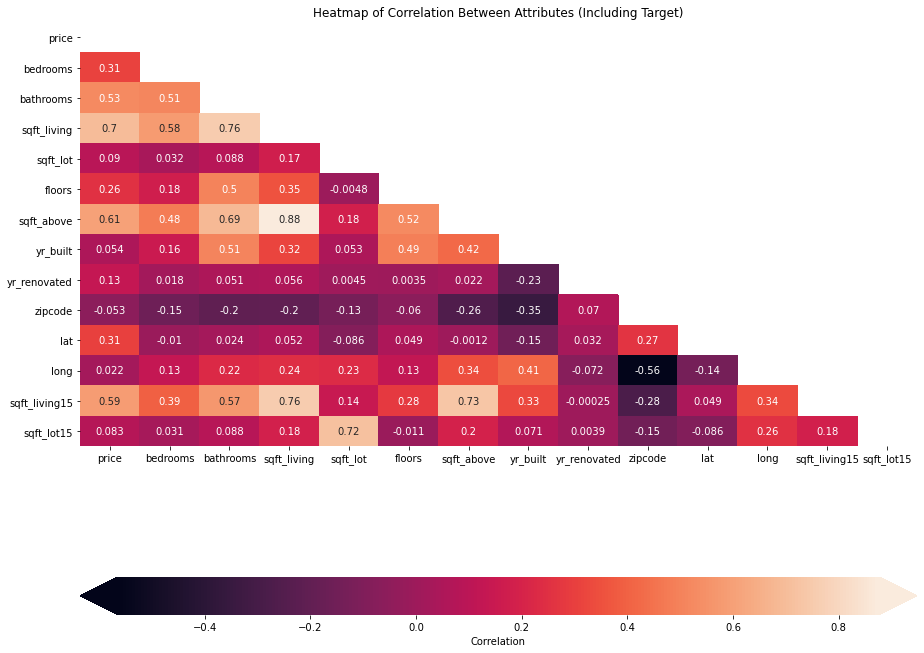

In [4]:
# Heatmap of correlations
corr = df.corr()

# Set up figure and axes wih a fig size that's easy to read
fig, ax = plt.subplots(figsize=(15, 12))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Let's focus on things like price, number of bedrooms and bathrooms, total sq. ft, and year built, and just take a gander at the sqft living space of the neighbors.

In [5]:
homes=pd.DataFrame(df, columns = ["price","bedrooms","bathrooms", "floors","yr_built", "yr_renovated", "sqft_living","sqft_living15", "date"])
homes.head()

,price,bedrooms,bathrooms,floors,yr_built,yr_renovated,sqft_living,sqft_living15,date
0,221900.0,3,1.00,1.0,1955,0.0,1180,1340,10/13/2014
1,538000.0,3,2.25,2.0,1951,1991.0,2570,1690,12/9/2014
2,180000.0,2,1.00,1.0,1933,NaN,770,2720,2/25/2015
3,604000.0,4,3.00,1.0,1965,0.0,1960,1360,12/9/2014
4,510000.0,3,2.00,1.0,1987,0.0,1680,1800,2/18/2015


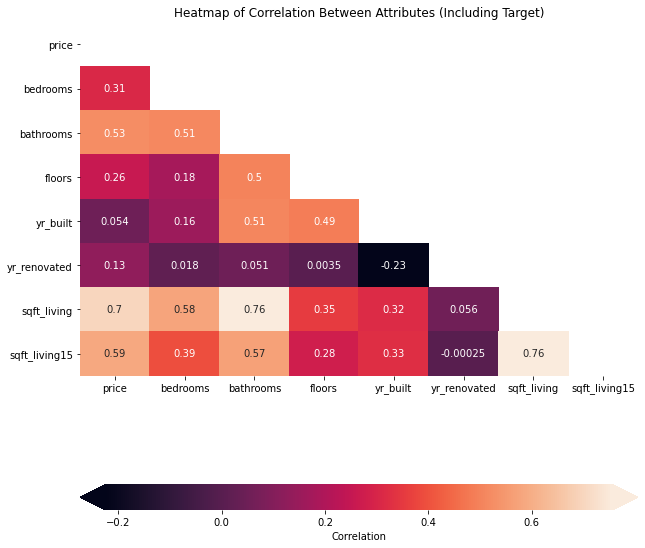

In [6]:
#creating another heatmap to get another visual of the correlations of our refined column choices
corr = homes.corr()

# Set up figure and axes wih a fig size that's easy to read
fig, ax = plt.subplots(figsize=(10, 10))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

It seems like bathrooms, bedrooms, and the sqft living space has the most correlation. I find it interesting that there is such a high correlation with sqft living and bathrooms, but perhaps if you have a lot of space, you will be more likely to take advantage and make more bathrooms. 

I admit I was surpised that the bathrooms have a higher correlation than the bedrooms, but I can understand how a bathroom would be more valuable considering all of the plumbing and presumably decorative/fuctional features like tile, sealant, venting, and exhaust would add up. 

Another interesting thing to note is that correlation between age of the house and how many bathrooms it has! We could look into that, presuming that the newer the house is, the more likely it is to have more bathrooms.

But let's start at the top and work our way down for some data cleaning. 


## Part 2: Data Understanding and Cleanup!

Let's take a quick view of the data to get an idea of what we may need to consider.

In [7]:
# check descriptive statistics to get an overview of the data
homes.describe()

,price,bedrooms,bathrooms,floors,yr_built,yr_renovated,sqft_living,sqft_living15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,1.494096,1970.999676,83.636778,2080.321850,1986.620318
std,3.673681e+05,0.926299,0.768984,0.539683,29.375234,399.946414,918.106125,685.230472
min,7.800000e+04,1.000000,0.500000,1.000000,1900.000000,0.000000,370.000000,399.000000
25%,3.220000e+05,3.000000,1.750000,1.000000,1951.000000,0.000000,1430.000000,1490.000000
50%,4.500000e+05,3.000000,2.250000,1.500000,1975.000000,0.000000,1910.000000,1840.000000
75%,6.450000e+05,4.000000,2.500000,2.000000,1997.000000,0.000000,2550.000000,2360.000000
max,7.700000e+06,33.000000,8.000000,3.500000,2015.000000,2015.000000,13540.000000,6210.000000


IndexError: index 2 is out of bounds for axis 0 with size 2

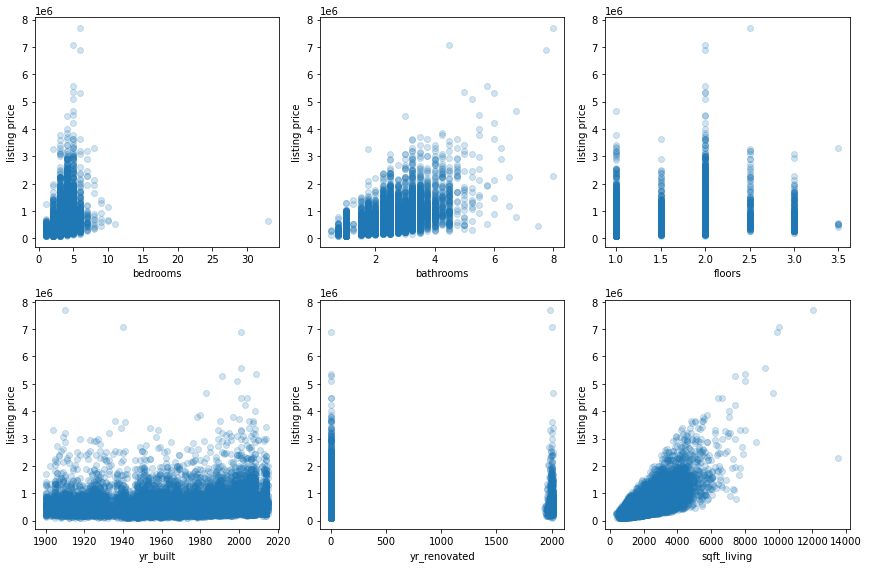

In [8]:
scatterplot_data = homes.drop("price", axis=1)

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(homes[col], homes['price'], alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")

Wow, bedrooms have a max of 33! We'll check that out later. Let's narrow the date down to just the month, convert the price from float to an int, get rid of any extreme outliers for bedrooms, and split the bathrooms up with dummies! 

Questions to consider:
* Why are there half floors and quarter/three quarter baths? Will have to look into this and might have to convert to dummies...
* There are a lot of houses with a renovation listed as 0, presumably that the home was not renovated - might be another good contender for dummies or a column all it's own

## Months

In [9]:
#Strip out the month of the date, and convert it to an int
from dateutil import parser

#empty list to put the months in
mon_sold = []

# Go through the df, pull out all the months, then add it to our mon_sold list
for i in homes['date']:
    parsed = parser.parse(i).strftime('%m')
    mon_sold.append(parsed)

#THEN we convert our list into a dataframe
mon_sold_df = pd.DataFrame({'mon_sold':mon_sold})

# Combine it back into our homes dataframe 
homes = pd.concat([homes, mon_sold_df], axis=1)

# View dataframe
homes.drop('date', axis=1, inplace=True)
homes.head()


,price,bedrooms,bathrooms,floors,yr_built,yr_renovated,sqft_living,sqft_living15,mon_sold
0,221900.0,3,1.00,1.0,1955,0.0,1180,1340,10
1,538000.0,3,2.25,2.0,1951,1991.0,2570,1690,12
2,180000.0,2,1.00,1.0,1933,NaN,770,2720,02
3,604000.0,4,3.00,1.0,1965,0.0,1960,1360,12
4,510000.0,3,2.00,1.0,1987,0.0,1680,1800,02


Gorgeous.

## How Does Timing (month sold) affect price?

05    11.177478
04    10.320878
07    10.237533
06    10.084734
08     8.978099
10     8.686392
03     8.681761
09     8.200213
12     6.806501
11     6.524054
02     5.773950
01     4.528407
Name: mon_sold, dtype: float64

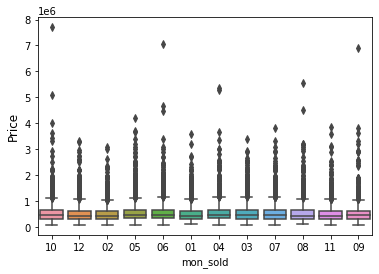

In [10]:
#boxplot showing home prices vs the month they sold (closed)
sns.boxplot(x=homes['mon_sold'], y=homes['price'], data=homes)
plt.ylabel('Price', fontsize=12)

#Percentage of homes sold in each month
homes['mon_sold'].value_counts()/len(homes)*100


Fascinating! We can see most homes sell in mid to late Spring to early Autumn. We should take a moment to note that this date reflects the closing, and is only one part of the buying process. While all cash buyers can close in about a week if they wave contingencies, depending on if you are going with a standard mortgage, a VA or FHA loan, it could take about 30-52 days (or more, if there are complications with inspection or otherwise). *Source: <a href = "https://www.zillow.com/home-buying-guide/how-long-does-it-take-to-close-on-a-house/" target = "_self">Zillow</a>*

Because of this, you wanted to **buy a home for cheaper**, it would be wise to consider looking in late Autumn (**November**) and winter (**December thru January**). 

However, when you are looking to **sell for the most**, you would actually want to list in early Spring (**March**), or mid to late summer (**July and August**). 


## Convert year built to age
For ease of legibilty, let's convert the year built to age. 

In [11]:
#Converts the column to age by subtracting year built from 2015, when this set was released.
def age(born):
    born = born
    today = 2015
    return today - born

#apply "age" to work it's magic
homes['age'] = homes['yr_built'].apply(age)
#drop the old yr_built column
homes = homes.drop(['yr_built'], axis=1)
#Check that everything looks good
homes.head()

,price,bedrooms,bathrooms,floors,yr_renovated,sqft_living,sqft_living15,mon_sold,age
0,221900.0,3,1.00,1.0,0.0,1180,1340,10,60
1,538000.0,3,2.25,2.0,1991.0,2570,1690,12,64
2,180000.0,2,1.00,1.0,NaN,770,2720,02,82
3,604000.0,4,3.00,1.0,0.0,1960,1360,12,50
4,510000.0,3,2.00,1.0,0.0,1680,1800,02,28


## Converts!

In [14]:
## Convert price (and month sold while we're at it) from float to int
homes=homes.astype({'price': int, 'mon_sold': int})
homes

,price,bedrooms,bathrooms,floors,yr_renovated,sqft_living,sqft_living15,mon_sold,age
0,221900,3,1.00,1.0,0.0,1180,1340,10,60
1,538000,3,2.25,2.0,1991.0,2570,1690,12,64
2,180000,2,1.00,1.0,NaN,770,2720,2,82
3,604000,4,3.00,1.0,0.0,1960,1360,12,50
4,510000,3,2.00,1.0,0.0,1680,1800,2,28
...,...,...,...,...,...,...,...,...,...
21592,360000,3,2.50,3.0,0.0,1530,1530,5,6
21593,400000,4,2.50,2.0,0.0,2310,1830,2,1
21594,402101,2,0.75,2.0,0.0,1020,1020,6,6
21595,400000,3,2.50,2.0,0.0,1600,1410,1,11


In [15]:
# double check descriptive statistics for changes
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  int64  
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   floors         21597 non-null  float64
 4   yr_renovated   17755 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_living15  21597 non-null  int64  
 7   mon_sold       21597 non-null  int64  
 8   age            21597 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.5 MB


### Floors

After some internet sleuthing, I have found that in real estate, half floors refer to when the lowest point on a ceiling is less than 8 feet, such as a floor with a sloped ceiling (Source: https://activerain.com/blogsview/1422260/so-what-is-it--two-story-or-one-and-one-half-). Here is an example: 

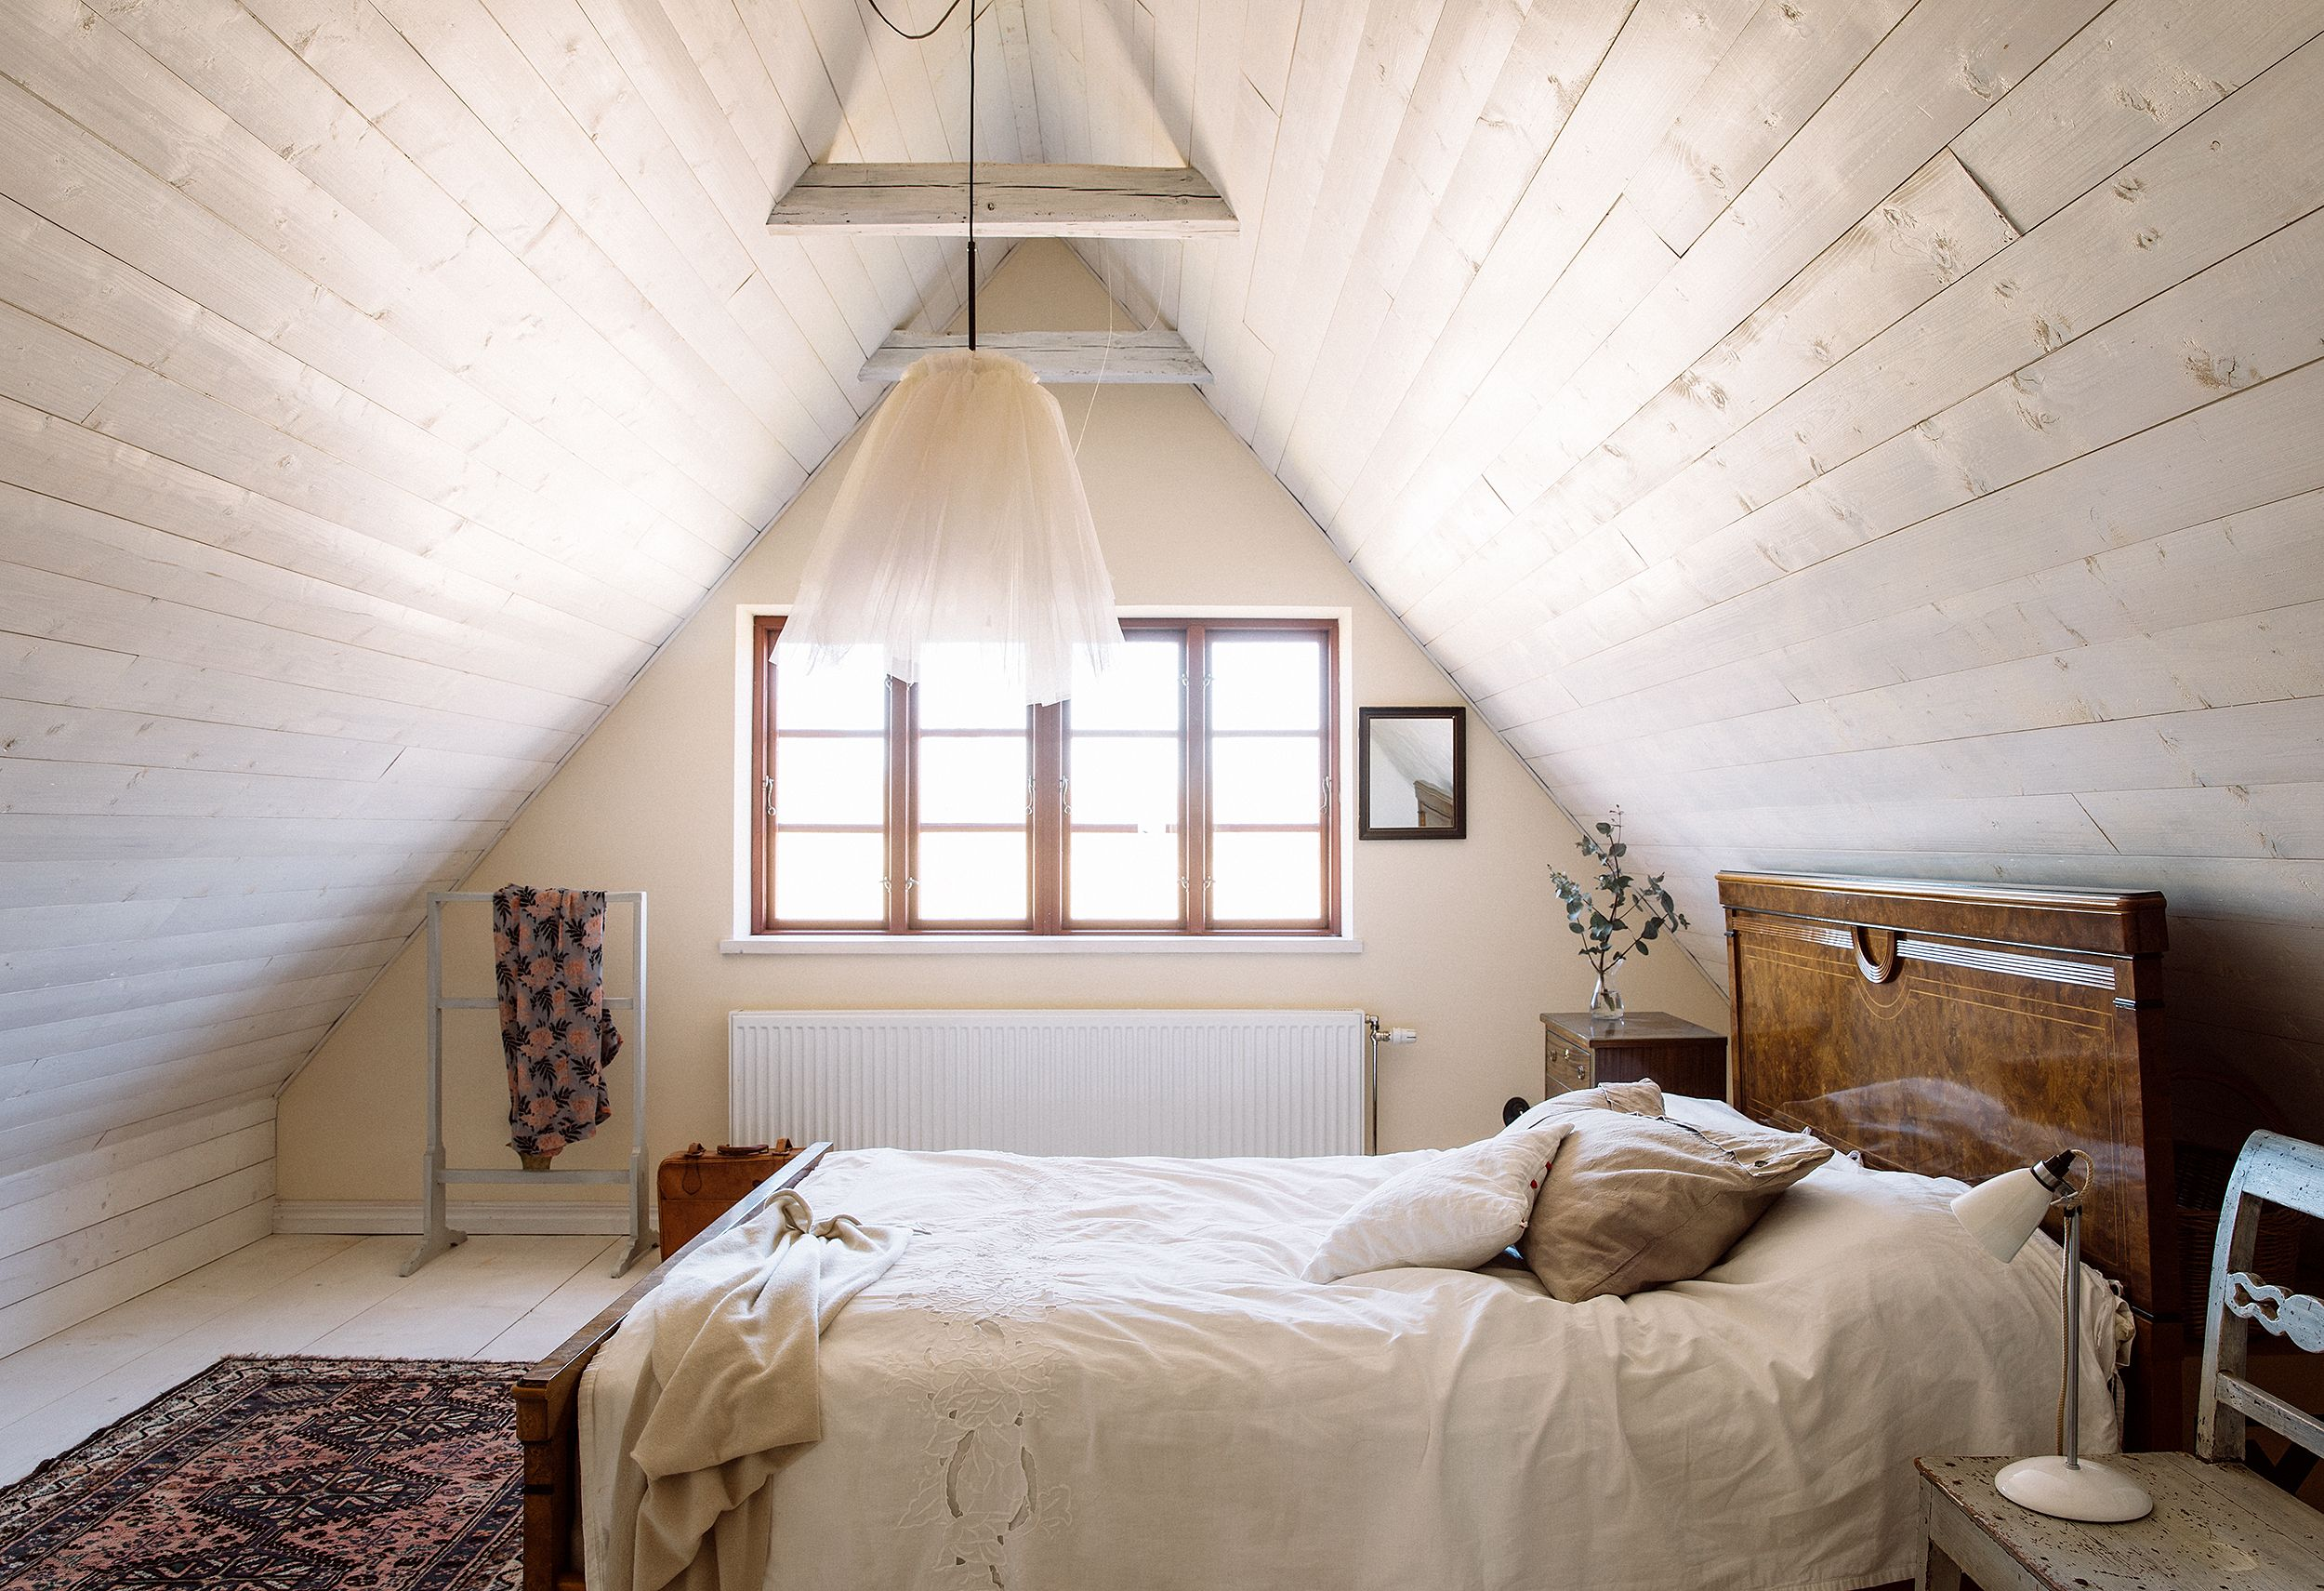

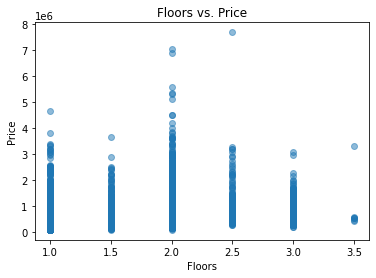

In [16]:
# Seeing how floors relate to price

floors = "floors"
fig, ax = plt.subplots()

ax.scatter( homes[floors], homes['price'], alpha=0.5)
ax.set_xlabel('Floors')
ax.set_ylabel("Price")
ax.set_title("Floors vs. Price");

Since these have .5 incriments, we can't convert to int, but we can split them into dummies. 

In [17]:
#Make a new df with your floors split up into their own columns
homes_dum=pd.get_dummies(data=homes, columns=['floors'], drop_first=False)
# Remove . from column names to be read by linear regression model
homes_dum.columns = [col.replace('.', '_') for col in homes_dum.columns]

# Check it
homes_dum.head()

,price,bedrooms,bathrooms,yr_renovated,sqft_living,sqft_living15,mon_sold,age,floors_1_0,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5
0,221900,3,1.00,0.0,1180,1340,10,60,1,0,0,0,0,0
1,538000,3,2.25,1991.0,2570,1690,12,64,0,0,1,0,0,0
2,180000,2,1.00,NaN,770,2720,2,82,1,0,0,0,0,0
3,604000,4,3.00,0.0,1960,1360,12,50,1,0,0,0,0,0
4,510000,3,2.00,0.0,1680,1800,2,28,1,0,0,0,0,0


### Bedrooms

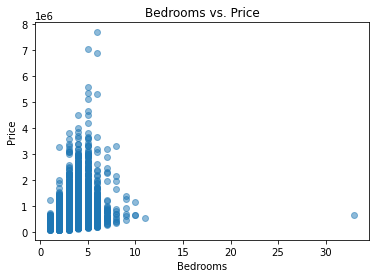

In [18]:
# Checking Bedrooms for outliers

bedrooms = "bedrooms"
fig, ax = plt.subplots()

ax.scatter(homes_dum[bedrooms], homes_dum['price'], alpha=0.5)
ax.set_xlabel('Bedrooms')
ax.set_ylabel("Price")
ax.set_title("Bedrooms vs. Price");

Seems like there is on pesky palace with over 30 rooms throwing things a little for a loop. Let's see if it counts as an outlier and trim it out!

In [19]:
#calculate interquartile range 
q75, q25 = np.percentile(homes['bedrooms'], [75 ,25])
iqr = q75 - q25

#display interquartile range 
print("Upper:", q75)
print("Lower:", q25)
print("IQR:", iqr)
print("Mean:", homes['bedrooms'].mean())
print("Median:", homes['bedrooms'].median())

Upper: 4.0
Lower: 3.0
IQR: 1.0
Mean: 3.3731999814789093
Median: 3.0


Yep, over 30 rooms is ***DEFINTELY*** an outlier. Let's axe it!

In [20]:
print(np.where(homes['bedrooms']>15))

(array([15856]),)


In [21]:
#nixing this on both our dummy df and our original 
homes_dum.drop([15856],inplace = True)
homes.drop([15856],inplace = True)
homes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21596 non-null  int64  
 1   bedrooms       21596 non-null  int64  
 2   bathrooms      21596 non-null  float64
 3   floors         21596 non-null  float64
 4   yr_renovated   17754 non-null  float64
 5   sqft_living    21596 non-null  int64  
 6   sqft_living15  21596 non-null  int64  
 7   mon_sold       21596 non-null  int64  
 8   age            21596 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.6 MB


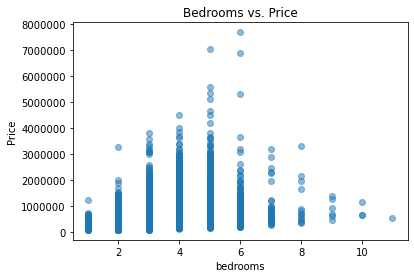

In [22]:
#Let's check it out to see how nixing just one outlier can change the overall plot

bedrooms = "bedrooms"
fig, ax = plt.subplots()

ax.scatter(homes[bedrooms], homes['price'], alpha=0.5)

ax.ticklabel_format(style='plain')
ax.set_xlabel(bedrooms)
ax.set_ylabel("Price")
ax.set_title("Bedrooms vs. Price");

Aaaaa, so much better! Now let's check out the value counts (in percetages) and make some dummies for bedrooms like we did with bathrooms.

In [23]:
#checking value counts in percentages
homes_dum['bedrooms'].value_counts()/(len(homes_dum)*.01)

3     45.489906
4     31.867012
2     12.780144
5      7.413410
6      1.259492
1      0.907575
7      0.175959
8      0.060196
9      0.027783
10     0.013891
11     0.004630
Name: bedrooms, dtype: float64

So it appears most houses have 3 or 4 rooms, which felt surprising to me, but I beleive that stems from my experience with apartment living where the norm would be 0-2 rooms. However, thinking back to all the houses I can remember being in, I can't think of a single one that only had 1 or 2 bedrooms. Wild! 

## Bathrooms

Just for fun, let's see the relationship between year built and how many bathrooms a home has.

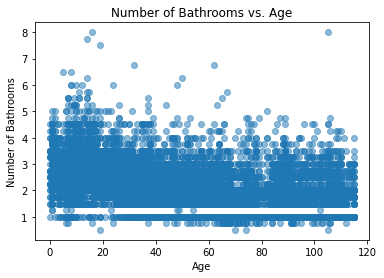

In [24]:
age = "age"
bathrooms = "bathrooms"
fig, ax = plt.subplots()

ax.scatter(homes_dum["age"], homes_dum[bathrooms], alpha=0.5)
ax.set_xlabel("Age")
ax.set_ylabel("Number of Bathrooms")
ax.set_title("Number of Bathrooms vs. Age");

It seems to pick up around the 1990s(25-15 years) with a big building boom around 2000 until 2010 (15-5 years), which might be hinting at the large housing crash of 2008 (7 years old). You can also see that around age 80 or so, there is a noticable decrease in houses - which would make sense as we were facing a depression and soon a war effort, so building wouldn't have been as strong as before or after. 

Facinating! 

Now let's look at price.


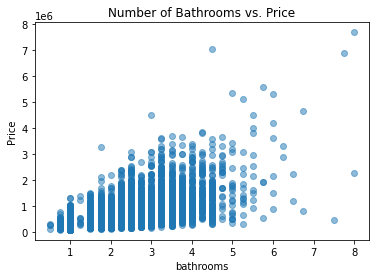

In [25]:
bathrooms = "bathrooms"
fig, ax = plt.subplots()

ax.scatter( homes_dum[bathrooms], homes_dum['price'], alpha=0.5)
ax.set_xlabel(bathrooms)
ax.set_ylabel("Price")
ax.set_title("Number of Bathrooms vs. Price");

Oooo, very nice! While we are here, it is worth mentioning that bathrooms are counted and categorized in quarters as such:
* `.25` - Containing a sink, but not a toilet, shower, or bath
* `.5` - Containing a sink and toilet, or a shower or bath
* `.75` - Containing a sink and toilet, and a shower or bath 
* `1` - Containing a sink, a toilet, a shower, and bath

Source: <a href = "https://illinado.com/what-is-a-quarter-bath/_" target = "_self">Illinado Home Solutions, LLC</a>


In [26]:
homes_dum=pd.get_dummies(data=homes_dum, columns=['bathrooms'], drop_first=False)
# Remove . from column names to be read by linear regression model
homes_dum.columns = [col.replace('.', '_') for col in homes_dum.columns]
# Check it
homes_dum.head()

,price,bedrooms,yr_renovated,sqft_living,sqft_living15,mon_sold,age,floors_1_0,floors_1_5,floors_2_0,...,bathrooms_5_25,bathrooms_5_5,bathrooms_5_75,bathrooms_6_0,bathrooms_6_25,bathrooms_6_5,bathrooms_6_75,bathrooms_7_5,bathrooms_7_75,bathrooms_8_0
0,221900,3,0.0,1180,1340,10,60,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000,3,1991.0,2570,1690,12,64,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,180000,2,NaN,770,2720,2,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000,4,0.0,1960,1360,12,50,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000,3,0.0,1680,1800,2,28,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Cool, now we have bathrooms separated with dummies. 

Let's do the same with bathrooms.

## Square foot Living Area

For kicks, lets see how sqft living space has changed over the years.

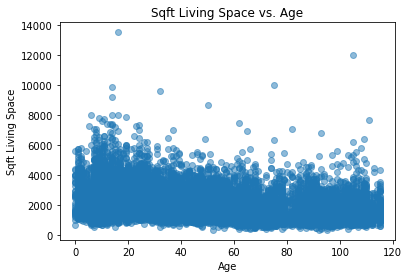

In [27]:
age = "age"
sqft_living = "sqft_living"
fig, ax = plt.subplots()

ax.scatter( homes["age"], homes[sqft_living], alpha=0.5)
ax.set_xlabel("Age")
ax.set_ylabel("Sqft Living Space")
ax.set_title("Sqft Living Space vs. Age");

No real surprise there, especially with that little jump between around 2000 and 2008 (15-7 yrs). 

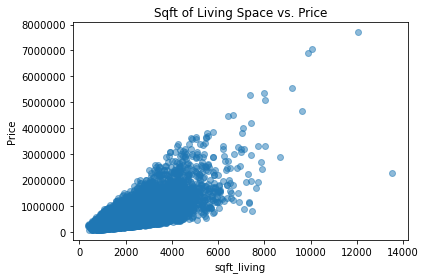

In [28]:
sqft = "sqft_living"
fig, ax = plt.subplots()

ax.scatter( homes[sqft], homes['price'], alpha=0.5)
ax.set_xlabel(sqft)
ax.set_ylabel("Price")
ax.ticklabel_format(style='plain')
ax.set_title("Sqft of Living Space vs. Price");

Looking good! Definitly a good line of correlation there. 

### Year Renovated
There are some 0's and Nans in yr_renovated. Let's bin them into renovated or not!

In [29]:
homes_dum.head()

,price,bedrooms,yr_renovated,sqft_living,sqft_living15,mon_sold,age,floors_1_0,floors_1_5,floors_2_0,...,bathrooms_5_25,bathrooms_5_5,bathrooms_5_75,bathrooms_6_0,bathrooms_6_25,bathrooms_6_5,bathrooms_6_75,bathrooms_7_5,bathrooms_7_75,bathrooms_8_0
0,221900,3,0.0,1180,1340,10,60,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000,3,1991.0,2570,1690,12,64,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,180000,2,NaN,770,2720,2,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000,4,0.0,1960,1360,12,50,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000,3,0.0,1680,1800,2,28,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Define our binning function
def reno_bin(yr_renovated):
    import math
    #Takes in year renovated, and returns a column to show that the home is renovated
    if yr_renovated == 0.0:
        return '0'
    elif math.isnan(yr_renovated):
        return '0'
    else:
        return '1'

# Create new feature based on the values returned from function
homes_dum['reno'] = homes_dum['yr_renovated'].apply(reno_bin)
homes_dum.head()

,price,bedrooms,yr_renovated,sqft_living,sqft_living15,mon_sold,age,floors_1_0,floors_1_5,floors_2_0,...,bathrooms_5_5,bathrooms_5_75,bathrooms_6_0,bathrooms_6_25,bathrooms_6_5,bathrooms_6_75,bathrooms_7_5,bathrooms_7_75,bathrooms_8_0,reno
0,221900,3,0.0,1180,1340,10,60,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000,3,1991.0,2570,1690,12,64,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,180000,2,NaN,770,2720,2,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000,4,0.0,1960,1360,12,50,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000,3,0.0,1680,1800,2,28,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
homes_dum = homes_dum.drop('yr_renovated', axis=1)
homes_dum = homes_dum.astype({'reno': int})
homes_dum.head()

,price,bedrooms,sqft_living,sqft_living15,mon_sold,age,floors_1_0,floors_1_5,floors_2_0,floors_2_5,...,bathrooms_5_5,bathrooms_5_75,bathrooms_6_0,bathrooms_6_25,bathrooms_6_5,bathrooms_6_75,bathrooms_7_5,bathrooms_7_75,bathrooms_8_0,reno
0,221900,3,1180,1340,10,60,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000,3,2570,1690,12,64,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,180000,2,770,2720,2,82,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000,4,1960,1360,12,50,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000,3,1680,1800,2,28,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Checking for Multicollinearity!


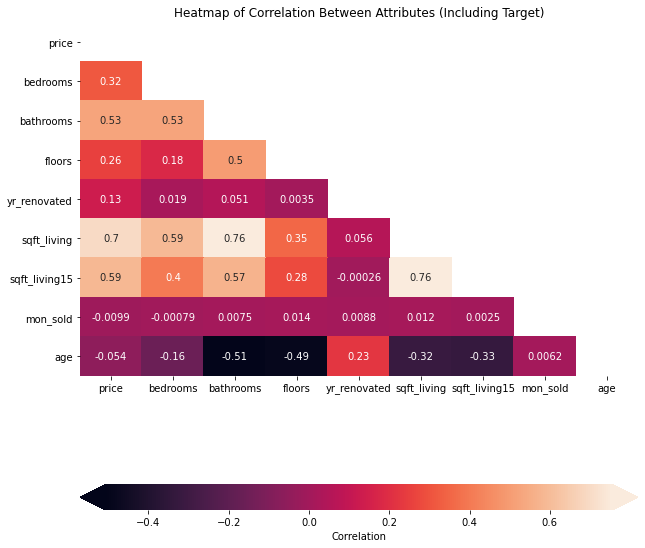

In [32]:
# before dummies
#creating another heatmap to get another visual of the correlations of our refined column choices
corr = homes.corr()

# Set up figure and axes wih a fig size that's easy to read
fig, ax = plt.subplots(figsize=(10, 10))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

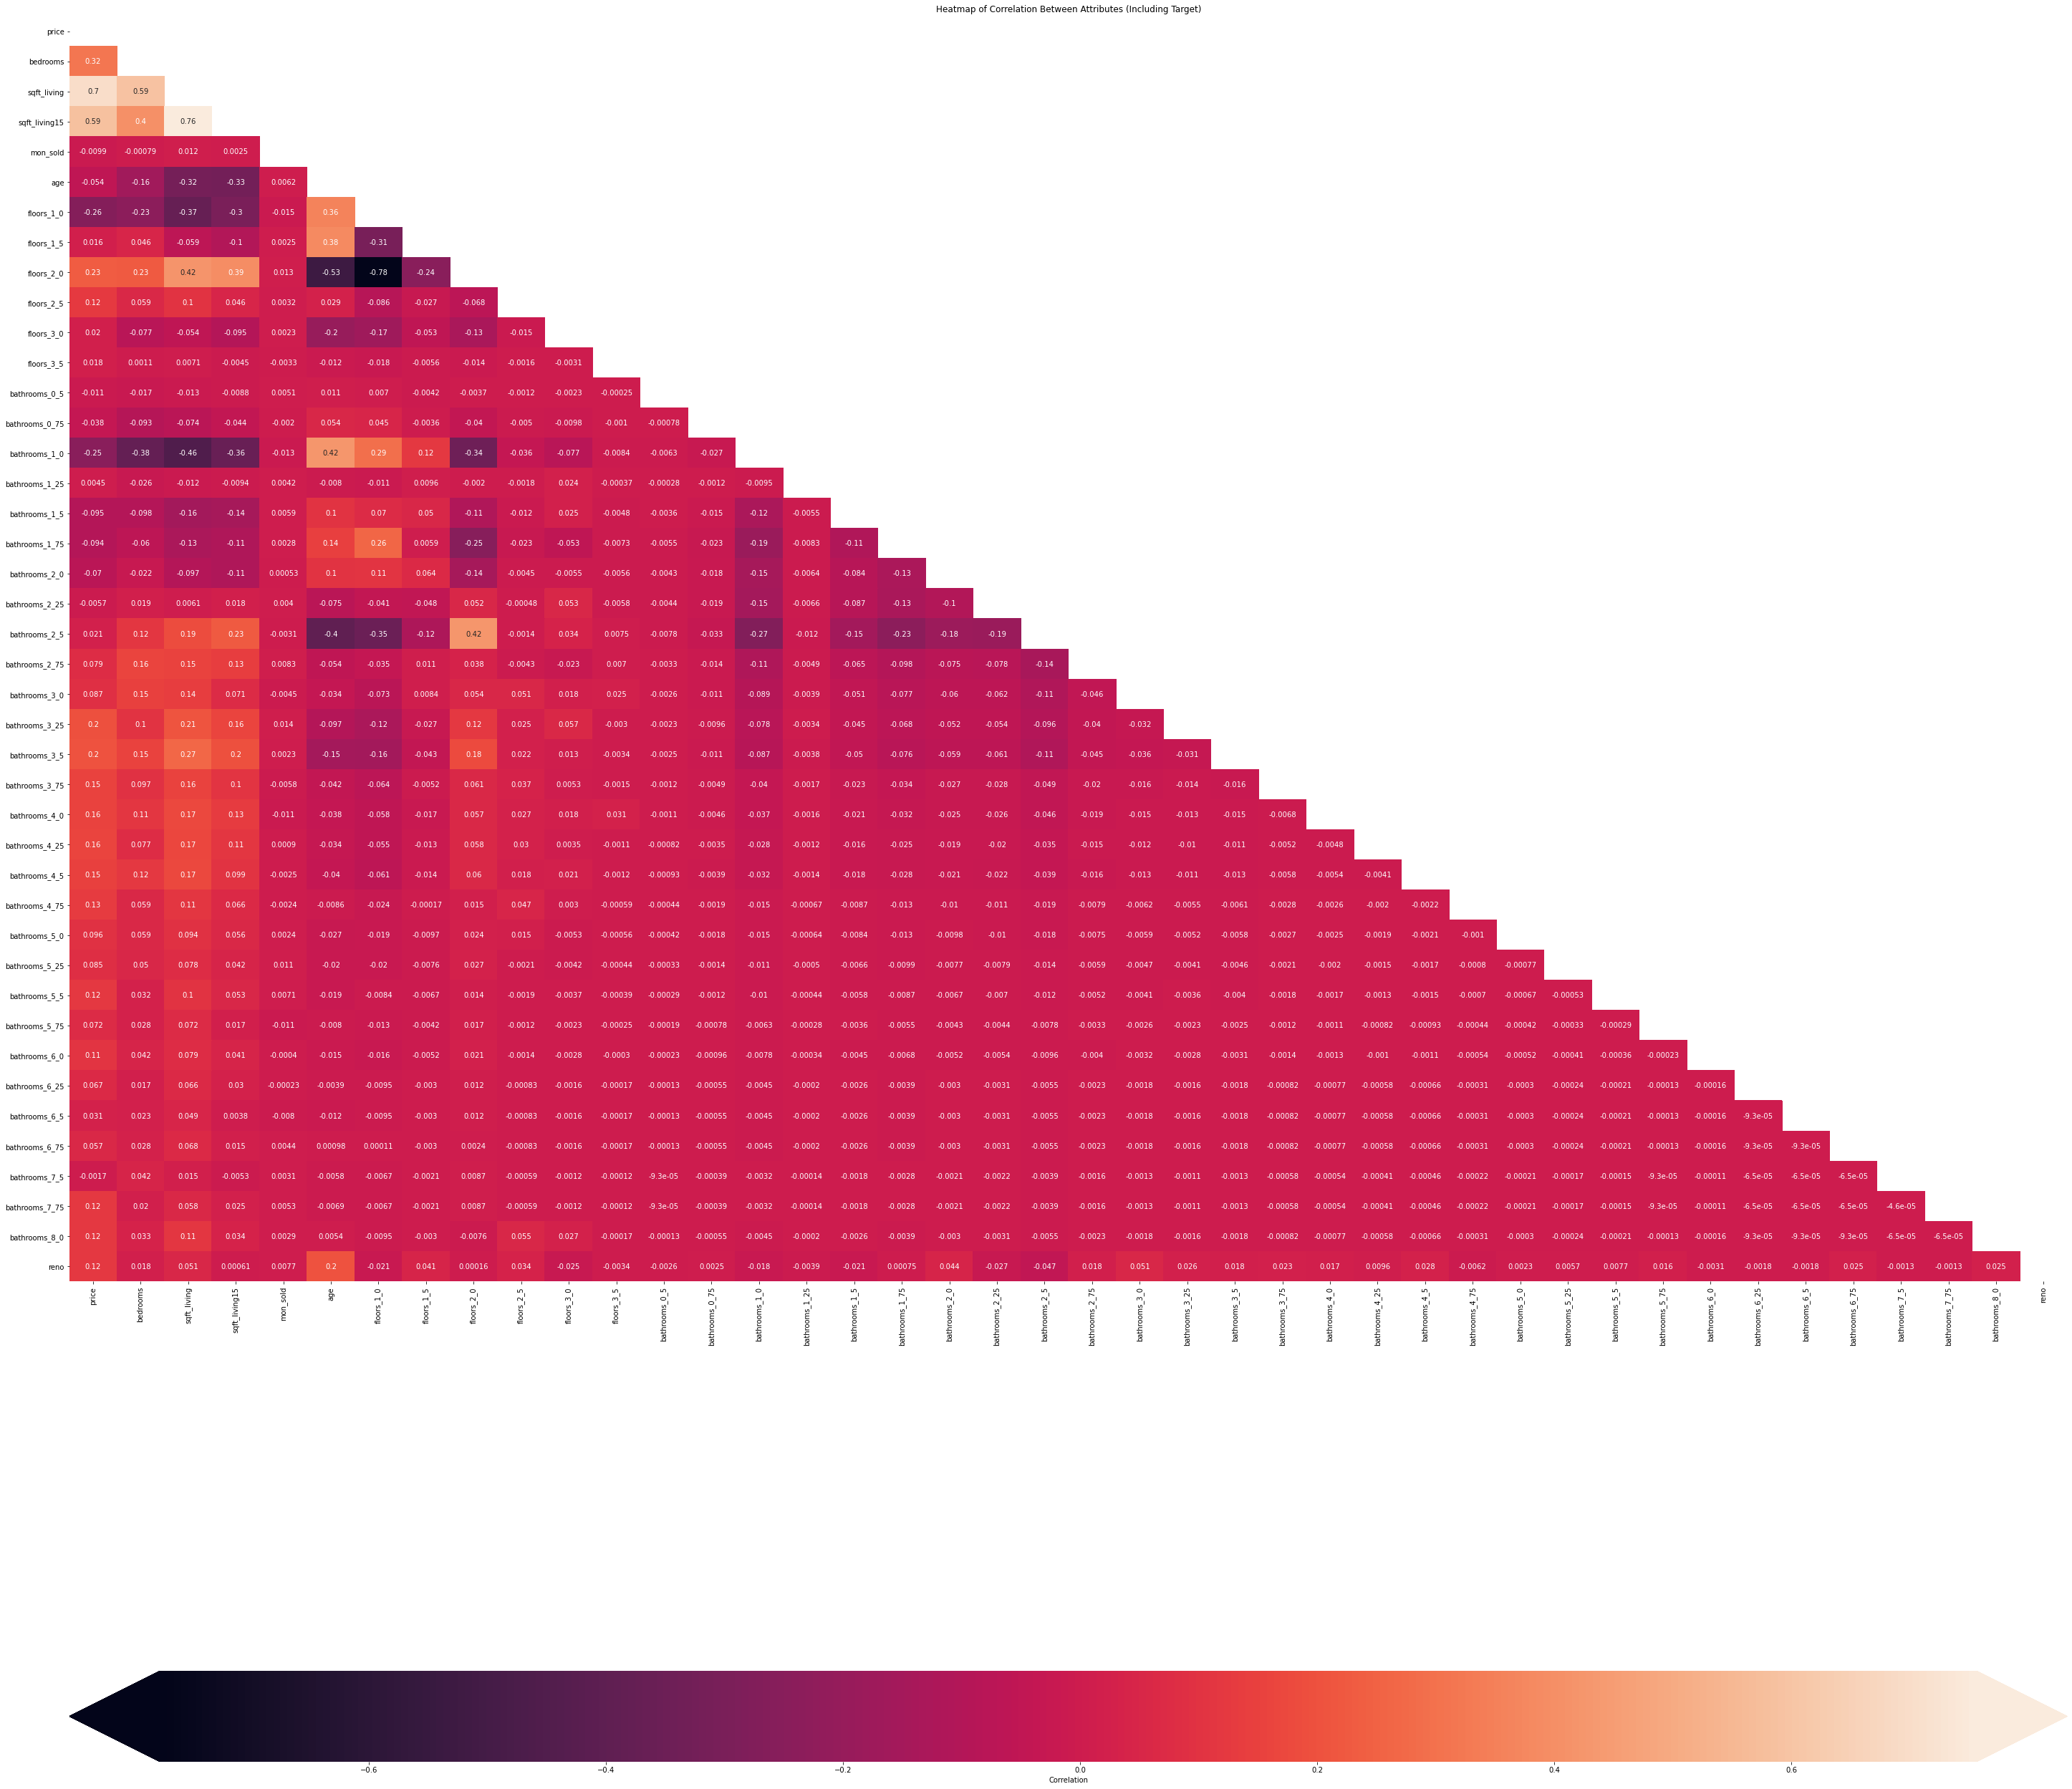

In [33]:
#creating another heatmap to get another visual of the correlations of our refined column choices
corr = homes_dum.corr()

# Set up figure and axes wih a fig size that's easy to read
fig, ax = plt.subplots(figsize=(50, 50))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [34]:
#Oops, that's hard to read, let's try this way
homes_dum.corr()

,price,bedrooms,sqft_living,sqft_living15,mon_sold,age,floors_1_0,floors_1_5,floors_2_0,floors_2_5,...,bathrooms_5_5,bathrooms_5_75,bathrooms_6_0,bathrooms_6_25,bathrooms_6_5,bathrooms_6_75,bathrooms_7_5,bathrooms_7_75,bathrooms_8_0,reno
price,1.000000,0.315961,0.701929,0.585267,-0.009926,-0.053965,-0.263539,0.015900,0.232710,0.122846,...,0.116135,0.072328,0.109273,0.066925,0.030643,0.057494,-0.001673,0.117619,0.116568,0.117546
bedrooms,0.315961,1.000000,0.593178,0.404532,-0.000792,-0.160736,-0.231941,0.046323,0.227555,0.059026,...,0.031620,0.028275,0.042314,0.017331,0.022654,0.027976,0.042362,0.019782,0.033299,0.018354
sqft_living,0.701929,0.593178,1.000000,0.756400,0.012108,-0.318140,-0.374337,-0.058512,0.419918,0.100541,...,0.103753,0.072378,0.079222,0.065668,0.049106,0.067922,0.014599,0.057885,0.112315,0.050825
sqft_living15,0.585267,0.404532,0.756400,1.000000,0.002505,-0.326353,-0.301008,-0.102145,0.393913,0.045924,...,0.052625,0.017199,0.041481,0.030384,0.003769,0.014794,-0.005349,0.025357,0.033825,0.000614
mon_sold,-0.009926,-0.000792,0.012108,0.002505,1.000000,0.006242,-0.015243,0.002548,0.012981,0.003212,...,0.007089,-0.011247,-0.000396,-0.000229,-0.007952,0.004406,0.003115,0.005300,0.002861,0.007657
age,-0.053965,-0.160736,-0.318140,-0.326353,0.006242,1.000000,0.356539,0.380609,-0.526984,0.028590,...,-0.018904,-0.007992,-0.014566,-0.003931,-0.012286,0.000983,-0.005791,-0.006950,0.005406,0.202848
floors_1_0,-0.263539,-0.231941,-0.374337,-0.301008,-0.015243,0.356539,1.000000,-0.307872,-0.775969,-0.085661,...,-0.008359,-0.013453,-0.016477,-0.009512,-0.009512,0.000112,-0.006726,-0.006726,-0.009512,-0.021155
floors_1_5,0.015900,0.046323,-0.058512,-0.102145,0.002548,0.380609,-0.307872,1.000000,-0.244540,-0.026995,...,-0.006704,-0.004240,-0.005193,-0.002998,-0.002998,-0.002998,-0.002120,-0.002120,-0.002998,0.041309
floors_2_0,0.232710,0.227555,0.419918,0.393913,0.012981,-0.526984,-0.775969,-0.244540,1.000000,-0.068040,...,0.014122,0.017337,0.021234,0.012258,0.012258,0.002352,0.008668,0.008668,-0.007555,0.000155
floors_2_5,0.122846,0.059026,0.100541,0.045924,0.003212,0.028590,-0.085661,-0.026995,-0.068040,1.000000,...,-0.001865,-0.001180,-0.001445,-0.000834,-0.000834,-0.000834,-0.000590,-0.000590,0.055105,0.033804


We can see that before we made the dummies for bathrooms and floors, bedrooms, bathrooms, sqft_living, and sqft_living15 seemed to have the highest correlation, but when we split up with the bathrooms, none of them even hit the significant mark of .3 to be on par with bedrooms.

In [35]:
#Converting columns to int64 for ease of use
homes_dum=homes_dum.astype({'floors_1_0':int, 'floors_1_5':int, 'floors_2_5':int, 
                            'floors_3_0':int, 'floors_3_5':int, 'bathrooms_0_5':int, 
                            'bathrooms_0_75':int, 'bathrooms_1_0':int, 'bathrooms_1_25':int,
                            'bathrooms_1_5':int, 'bathrooms_1_75':int, 'bathrooms_2_0':int, 
                            'bathrooms_2_25':int, 'bathrooms_2_5':int, 'bathrooms_2_75':int, 
                            'bathrooms_3_0':int, 'bathrooms_3_25':int, 'bathrooms_3_5':int, 
                            'bathrooms_3_75':int, 'bathrooms_4_0':int, 'bathrooms_4_25':int, 
                            'bathrooms_4_5':int, 'bathrooms_5_5':int, 'bathrooms_5_75':int, 
                            'bathrooms_6_0':int, 'bathrooms_6_25':int, 'bathrooms_7_5':int, 
                            'bathrooms_7_75':int, 'bathrooms_8_0':int, 'reno': int})
homes_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   price           21596 non-null  int64
 1   bedrooms        21596 non-null  int64
 2   sqft_living     21596 non-null  int64
 3   sqft_living15   21596 non-null  int64
 4   mon_sold        21596 non-null  int64
 5   age             21596 non-null  int64
 6   floors_1_0      21596 non-null  int64
 7   floors_1_5      21596 non-null  int64
 8   floors_2_0      21596 non-null  uint8
 9   floors_2_5      21596 non-null  int64
 10  floors_3_0      21596 non-null  int64
 11  floors_3_5      21596 non-null  int64
 12  bathrooms_0_5   21596 non-null  int64
 13  bathrooms_0_75  21596 non-null  int64
 14  bathrooms_1_0   21596 non-null  int64
 15  bathrooms_1_25  21596 non-null  int64
 16  bathrooms_1_5   21596 non-null  int64
 17  bathrooms_1_75  21596 non-null  int64
 18  bathrooms_2_0   21596 non-

# Part 3: Data analysis - Making a Model

In [36]:
# import statsmodels library
import statsmodels.api as sm

# create predictors
predictors = homes_dum.drop(['price'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(homes_dum['price'],predictors_int).fit()

In [37]:
# Create X and y
y = homes_dum[['price']]
X = homes_dum.drop(['price'], axis=1)

In [38]:
# Create train and test datasets from homes_dum with an 80% train, 20% test ratio, check sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

17276 4320 17276 4320


### Linear Regression

IndexError: index 2 is out of bounds for axis 0 with size 2

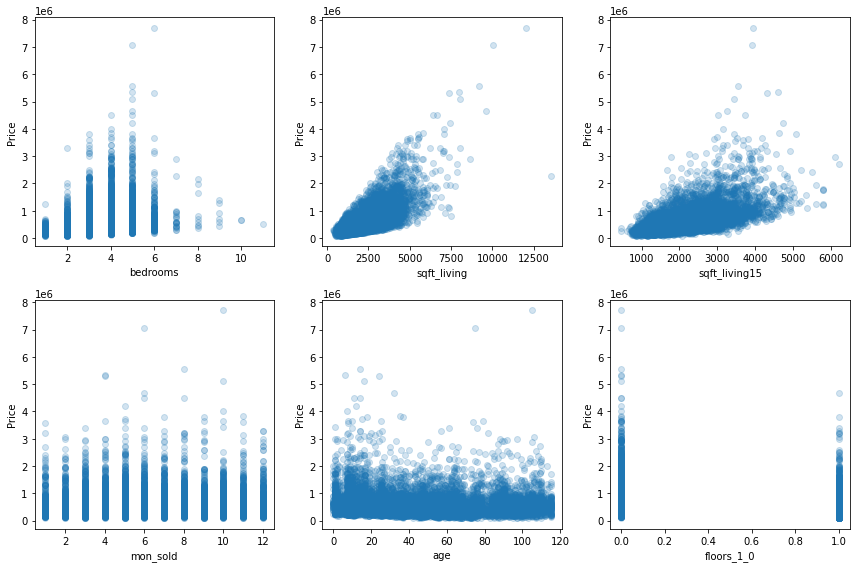

In [39]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(X_train.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("Price")

In [40]:
linreg = LinearRegression()
# Fit to our training data
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [41]:
# Create train & test residuals
train_res = y_hat_train - y_train
test_res = y_hat_test - y_test
print("train:", train_res)
print("test:", test_res)

train:                price
6761   240147.963622
12267   56370.119014
12055 -289029.786721
16707  293519.877808
16123   57337.181370
...              ...
13014   45095.602093
14097  128062.808884
11421   87061.462563
1725   235828.004454
13567  271228.576704

[17276 rows x 1 columns]
test:                price
6424  -305182.983304
2962  -271448.390595
4678   -80351.997390
12818  -10136.498864
3040   -90507.536495
...              ...
19284  137289.445565
11903 -224718.549444
14748  177483.219932
15320  230818.248305
6138    28071.239135

[4320 rows x 1 columns]


Residuals are the difference between the actual value and the predicted value. We can see that there is pretty big difference between many of the predicted values and the actual values, some equalling **well over** $100,000.

In [42]:
# Compute MSE for train and test set
train_mse = np.sum((y_train-y_hat_train)**2)/len(y_train)
test_mse = np.sum((y_test-y_hat_test)**2)/len(y_test)

print('Train Mean Squared Error: ', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error:  price    5.432218e+10
dtype: float64
Test Mean Squared Error:  price    5.597256e+10
dtype: float64


* The mean squared error (MSE) tells you how close a regression line is to a set of points. 
* It seems to me like the MSE is actually pretty high, let's take a look.

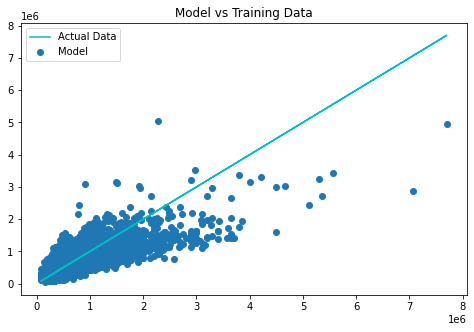

In [43]:
# Create a matplotlib plot for Model vs Training Data
plt.figure(figsize=(8, 5))
# Create a scatterplot on the figure of y-train
plt.scatter(y_train, y_hat_train, label='Model')
# Plot y_hat_train
plt.plot(y_train, y_train, label='Actual Data', color='c')
plt.title('Model vs Training Data')
plt.legend()

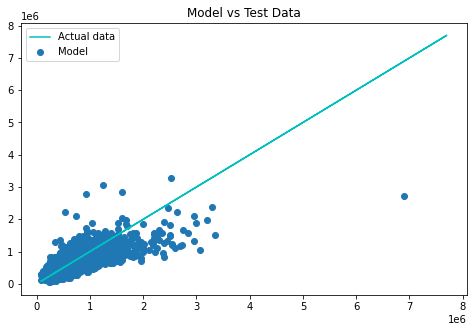

In [44]:
# Create a matplotlib figure for Model vs Test Data
plt.figure(figsize=(8, 5))
# Create a scatter plot
plt.scatter(y_test, y_hat_test, label='Model')
plt.plot(y_train, y_train, label='Actual data', color='c')
plt.title('Model vs Test Data')
plt.legend()

In [45]:
homes_dum.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_living15', 'mon_sold', 'age',
       'floors_1_0', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0',
       'floors_3_5', 'bathrooms_0_5', 'bathrooms_0_75', 'bathrooms_1_0',
       'bathrooms_1_25', 'bathrooms_1_5', 'bathrooms_1_75', 'bathrooms_2_0',
       'bathrooms_2_25', 'bathrooms_2_5', 'bathrooms_2_75', 'bathrooms_3_0',
       'bathrooms_3_25', 'bathrooms_3_5', 'bathrooms_3_75', 'bathrooms_4_0',
       'bathrooms_4_25', 'bathrooms_4_5', 'bathrooms_4_75', 'bathrooms_5_0',
       'bathrooms_5_25', 'bathrooms_5_5', 'bathrooms_5_75', 'bathrooms_6_0',
       'bathrooms_6_25', 'bathrooms_6_5', 'bathrooms_6_75', 'bathrooms_7_5',
       'bathrooms_7_75', 'bathrooms_8_0', 'reno'],
      dtype='object')

In [47]:
# Plug in the dependent and indepenent variables to be fed into our model
outcome = 'price'
x_cols = ['bedrooms', 'sqft_living', 'sqft_living15', 'mon_sold', 'age',
       'floors_1_0', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0',
       'floors_3_5', 'bathrooms_0_5', 'bathrooms_0_75', 'bathrooms_1_0',
       'bathrooms_1_25', 'bathrooms_1_5', 'bathrooms_1_75', 'bathrooms_2_0',
       'bathrooms_2_25', 'bathrooms_2_5', 'bathrooms_2_75', 'bathrooms_3_0',
       'bathrooms_3_25', 'bathrooms_3_5', 'bathrooms_3_75', 'bathrooms_4_0',
       'bathrooms_4_25', 'bathrooms_4_5', 'bathrooms_4_75', 'bathrooms_5_0',
       'bathrooms_5_25', 'bathrooms_5_5', 'bathrooms_5_75', 'bathrooms_6_0',
       'bathrooms_6_25', 'bathrooms_6_5', 'bathrooms_6_75', 'bathrooms_7_5',
       'bathrooms_7_75', 'bathrooms_8_0', 'reno']

# Create the predictors object to be used in the OLS model
predictors = '+'.join(x_cols)
# Formula to create our model
formula = outcome + '~' + predictors
# Make our linear regression model
model = ols(formula=formula, data=homes_dum).fit()
# Summarize the Data
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     839.5
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:14:54   Log-Likelihood:            -2.9740e+05
No. Observations:               21596   AIC:                         5.949e+05
Df Residuals:                   21556   BIC:                         5.952e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.598e+05   2.26e+04     20.367      0.000    4.16e+05    5.04e+05
bedrooms       -5.615e+04   2269.607    -24.740      0.000   -6.06e+04   -5.17e+04
sqft_living      220.3785      3.674     59.989      0.000     213.178     227.579
sqft_living15    114.2878      3.666     31.172      0.000     107.101     121.474
mon_sold       -2536.3863    506.625     -5.006      0.000   -3529.409   -1543.364
age             3042.4419     78.771     38.624      0.000    2888.045    3196.839
floors_1_0     -6.446e+04   1.37e+04     -4.714      0.000   -9.13e+04   -3.77e+04
floors_1_5     -4.771e+04   1.46e+04     -3.275      0.001   -7.63e+04   -1.92e+04
floors_2_0     -2.636e+04   1.36e+04     -1.934      0.053   -5.31e+04     349.451
floors_2_5       1.29e+05   2.06e+04      6.270      0.000    8.87e+04    1.69e+05
floors_3_0      1.687e+05   1.55e+04     10.866      0.000    1.38e+05    1.99e+05
floors_3_5      3.006e+05   7.52e+04      3.998      0.000    1.53e+05    4.48e+05
bathrooms_0_5  -6.741e+05   1.14e+05     -5.930      0.000   -8.97e+05   -4.51e+05
bathrooms_0_75 -5.669e+05   3.36e+04    -16.873      0.000   -6.33e+05   -5.01e+05
bathrooms_1_0  -5.306e+05   2.04e+04    -26.052      0.000   -5.71e+05   -4.91e+05
bathrooms_1_25 -3.245e+05   7.71e+04     -4.210      0.000   -4.76e+05   -1.73e+05
bathrooms_1_5  -5.127e+05   2.03e+04    -25.295      0.000   -5.52e+05   -4.73e+05
bathrooms_1_75 -5.155e+05   1.96e+04    -26.256      0.000   -5.54e+05   -4.77e+05
bathrooms_2_0  -5.124e+05   1.98e+04    -25.890      0.000   -5.51e+05   -4.74e+05
bathrooms_2_25 -4.933e+05   1.94e+04    -25.427      0.000   -5.31e+05   -4.55e+05
bathrooms_2_5  -5.203e+05   1.88e+04    -27.662      0.000   -5.57e+05   -4.83e+05
bathrooms_2_75 -4.939e+05   1.95e+04    -25.357      0.000   -5.32e+05   -4.56e+05
bathrooms_3_0  -4.612e+05      2e+04    -23.094      0.000      -5e+05   -4.22e+05
bathrooms_3_25 -3.379e+05   2.02e+04    -16.725      0.000   -3.78e+05   -2.98e+05
bathrooms_3_5  -3.857e+05   1.97e+04    -19.551      0.000   -4.24e+05   -3.47e+05
bathrooms_3_75 -2.324e+05   2.53e+04     -9.201      0.000   -2.82e+05   -1.83e+05
bathrooms_4_0  -2.531e+05   2.61e+04     -9.678      0.000   -3.04e+05   -2.02e+05
bathrooms_4_25 -1.257e+05   3.08e+04     -4.087      0.000   -1.86e+05   -6.54e+04
bathrooms_4_5  -2.235e+05   2.85e+04     -7.836      0.000   -2.79e+05   -1.68e+05
bathrooms_4_75   2.06e+05      5e+04      4.124      0.000    1.08e+05    3.04e+05
bathrooms_5_0   4.838e+04    5.2e+04      0.931      0.352   -5.35e+04     1.5e+05
bathrooms_5_25  1.684e+05   6.46e+04      2.609      0.009    4.19e+04    2.95e+05
bathrooms_5_5   4.696e+05   7.32e+04      6.415      0.000    3.26e+05    6.13e+05
bathrooms_5_75  4.062e+05   1.14e+05      3.575      0.000    1.84e+05    6.29e+05
bathrooms_6_

Cool, but let's remove the features with p-values above alpha of .05

In [48]:
# Remove the features with p-values above alpha of .05
homes_dum = homes_dum.drop(['floors_2_0', 'bathrooms_5_0', 'bathrooms_6_5', 'bathrooms_6_75'], axis=1)
homes_dum.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_living15', 'mon_sold', 'age',
       'floors_1_0', 'floors_1_5', 'floors_2_5', 'floors_3_0', 'floors_3_5',
       'bathrooms_0_5', 'bathrooms_0_75', 'bathrooms_1_0', 'bathrooms_1_25',
       'bathrooms_1_5', 'bathrooms_1_75', 'bathrooms_2_0', 'bathrooms_2_25',
       'bathrooms_2_5', 'bathrooms_2_75', 'bathrooms_3_0', 'bathrooms_3_25',
       'bathrooms_3_5', 'bathrooms_3_75', 'bathrooms_4_0', 'bathrooms_4_25',
       'bathrooms_4_5', 'bathrooms_4_75', 'bathrooms_5_25', 'bathrooms_5_5',
       'bathrooms_5_75', 'bathrooms_6_0', 'bathrooms_6_25', 'bathrooms_7_5',
       'bathrooms_7_75', 'bathrooms_8_0', 'reno'],
      dtype='object')

In [49]:
outcome = 'price'
x_cols2 = ['bedrooms', 'sqft_living', 'sqft_living15', 'mon_sold', 'age',
       'floors_1_0', 'floors_1_5', 'floors_2_5', 'floors_3_0', 'floors_3_5',
       'bathrooms_0_5', 'bathrooms_0_75', 'bathrooms_1_0', 'bathrooms_1_25',
       'bathrooms_1_5', 'bathrooms_1_75', 'bathrooms_2_0', 'bathrooms_2_25',
       'bathrooms_2_5', 'bathrooms_2_75', 'bathrooms_3_0', 'bathrooms_3_25',
       'bathrooms_3_5', 'bathrooms_3_75', 'bathrooms_4_0', 'bathrooms_4_25',
       'bathrooms_4_5', 'bathrooms_4_75', 'bathrooms_5_25', 'bathrooms_5_5',
       'bathrooms_5_75', 'bathrooms_6_0', 'bathrooms_6_25', 'bathrooms_7_5',
       'bathrooms_7_75', 'bathrooms_8_0', 'reno']

# Create the predictors object to be used in the OLS model
predictors = '+'.join(x_cols2)
# Formula for linear regression model
formula = outcome + '~' + predictors
# Make our linear regression model
model1 = ols(formula=formula, data=homes_dum).fit()
# Summarize the Data
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     884.7
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:16:15   Log-Likelihood:            -2.9740e+05
No. Observations:               21596   AIC:                         5.949e+05
Df Residuals:                   21558   BIC:                         5.952e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.812e+05   4.91e+04      9.798      0.000    3.85e+05    5.77e+05
bedrooms       -5.616e+04   2269.379    -24.749      0.000   -6.06e+04   -5.17e+04
sqft_living      220.5058      3.659     60.261      0.000     213.333     227.678
sqft_living15    114.2712      3.659     31.230      0.000     107.099     121.443
mon_sold       -2528.2524    506.621     -4.990      0.000   -3521.267   -1535.238
age             3043.1080     78.772     38.632      0.000    2888.709    3197.507
floors_1_0     -3.803e+04   4604.500     -8.259      0.000   -4.71e+04    -2.9e+04
floors_1_5     -2.134e+04   7292.729     -2.926      0.003   -3.56e+04   -7042.463
floors_2_5      1.554e+05   1.87e+04      8.316      0.000    1.19e+05    1.92e+05
floors_3_0      1.952e+05   1.01e+04     19.348      0.000    1.75e+05    2.15e+05
floors_3_5      3.271e+05   8.77e+04      3.729      0.000    1.55e+05    4.99e+05
bathrooms_0_5  -7.221e+05   1.25e+05     -5.758      0.000   -9.68e+05   -4.76e+05
bathrooms_0_75 -6.149e+05   5.56e+04    -11.058      0.000   -7.24e+05   -5.06e+05
bathrooms_1_0  -5.786e+05   4.82e+04    -12.010      0.000   -6.73e+05   -4.84e+05
bathrooms_1_25 -3.725e+05   9.08e+04     -4.104      0.000    -5.5e+05   -1.95e+05
bathrooms_1_5  -5.607e+05   4.81e+04    -11.669      0.000   -6.55e+05   -4.67e+05
bathrooms_1_75 -5.635e+05   4.77e+04    -11.806      0.000   -6.57e+05    -4.7e+05
bathrooms_2_0  -5.604e+05   4.78e+04    -11.725      0.000   -6.54e+05   -4.67e+05
bathrooms_2_25 -5.413e+05   4.76e+04    -11.382      0.000   -6.34e+05   -4.48e+05
bathrooms_2_5  -5.683e+05   4.72e+04    -12.033      0.000   -6.61e+05   -4.76e+05
bathrooms_2_75 -5.419e+05   4.75e+04    -11.410      0.000   -6.35e+05   -4.49e+05
bathrooms_3_0  -5.093e+05   4.77e+04    -10.676      0.000   -6.03e+05   -4.16e+05
bathrooms_3_25  -3.86e+05   4.77e+04     -8.087      0.000    -4.8e+05   -2.92e+05
bathrooms_3_5  -4.338e+05   4.75e+04     -9.136      0.000   -5.27e+05   -3.41e+05
bathrooms_3_75 -2.806e+05   5.02e+04     -5.593      0.000   -3.79e+05   -1.82e+05
bathrooms_4_0  -3.012e+05   5.06e+04     -5.952      0.000      -4e+05   -2.02e+05
bathrooms_4_25  -1.74e+05   5.33e+04     -3.267      0.001   -2.78e+05   -6.96e+04
bathrooms_4_5  -2.717e+05   5.19e+04     -5.235      0.000   -3.73e+05    -1.7e+05
bathrooms_4_75  1.577e+05    6.7e+04      2.354      0.019    2.64e+04    2.89e+05
bathrooms_5_25  1.201e+05   7.92e+04      1.516      0.130   -3.52e+04    2.75e+05
bathrooms_5_5   4.211e+05   8.68e+04      4.851      0.000    2.51e+05    5.91e+05
bathrooms_5_75  3.577e+05   1.25e+05      2.862      0.004    1.13e+05    6.03e+05
bathrooms_6_0   9.034e+05   1.05e+05      8.572      0.000    6.97e+05    1.11e+06
bathrooms_6_25  4.994e+05   1.71e+05      2.928      0.003    1.65e+05    8.34e+05
bathrooms_7_

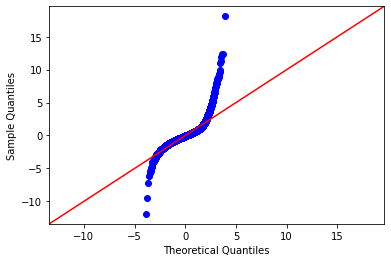

In [50]:
# Create qqplot of data
fig = sm.graphics.qqplot(model1.resid, dist=stats.norm, line='45', fit=True)


### Mean Absolute Error
Represents absolute error in our models ability to predict our dependent variable (price).

In [51]:
# return residuals from model
residuals = model1.resid
# return predicted values from model
y_pred = model1.fittedvalues
# true y value
y = homes_dum["price"]
# return mean absolute error of model
mae_resid = np.mean(np.abs(y - y_pred))

# view residuals from model
mae_resid

150703.75539335803

This shows us that on average, our model has an error of 150,703.76 USD when predicting the price of a home.


### Mean Squared Error
The Mean Squared Error tells us how close the regression line of our model is to a set of true points.

In [53]:
# return Mean Squared Error of model
mse_resid = model1.mse_resid

# view MSE
mse_resid


53683673400.89035

This shows our model has an error of 53,683,673,400.89 USD squared... That's a pretty big MSE. 

### Root Mean Squared Error


In [54]:
# return Root Mean Squared Error
rmse_residuals = np.sqrt(model1.mse_resid)

# view Root Mean Squared Error
rmse_residuals

231697.3746094037

Here our RMSE informs us that the expected error between the true values and the values our model predicts is 231,697.37 USD when predicting the score of a project in our training data.




## Baseline Model Conclusions

#### Mean Absolute Error: 150,703.76 USD
The MAE informs us that on average, our model has an error of 150,741.88 USD when predicting the price of a home.

#### Mean Squared Error: 53,683,673,400.89  USD
This shows our model has an error of 53,683,673,400.89 USD squared, which is considerable.

#### Root Mean Squared Error: 231,697.37 USD
Here our RMSE informs us that the expected error between the true values and the values our model predicts is 231,718.45 USD when predicting the score of a project in our training data.

This is larger than our MAE of 151,231.98 USD. We can presume that there are some considerable outliers because of this. 

#### Adjusted R-Squared = 0.607

60.7% of the variations in price are explained by the features in our model.

#### Coefficient Comments:

* Overall high values for coefficients for bathrooms, bedrooms, and floors
* Bathrooms overall have the highest coefficients for determining the price of a home with bathrooms_7_75 coming in at a whopping 4.532e+06


### Axing Outliers

Let's focus on axing outliers for bedrooms. 

In [55]:
# Calculate the z_scores of bedrooms with stats library
from scipy.stats import zscore
df_bed=homes_dum[['bedrooms']].copy()
z_scores = df_bed.apply(zscore)

# Get the absolute z-scores
abs_z_scores = np.abs(z_scores)

# Filter in values that are within the 3rd standard deviation
filtered_entries = (abs_z_scores < 3).all(axis=1)
homes_dum_out = homes_dum[filtered_entries]

In [56]:
#checking for how much we have left after filtering out the outliers

homes_dum_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21535 entries, 0 to 21596
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   price           21535 non-null  int64
 1   bedrooms        21535 non-null  int64
 2   sqft_living     21535 non-null  int64
 3   sqft_living15   21535 non-null  int64
 4   mon_sold        21535 non-null  int64
 5   age             21535 non-null  int64
 6   floors_1_0      21535 non-null  int64
 7   floors_1_5      21535 non-null  int64
 8   floors_2_5      21535 non-null  int64
 9   floors_3_0      21535 non-null  int64
 10  floors_3_5      21535 non-null  int64
 11  bathrooms_0_5   21535 non-null  int64
 12  bathrooms_0_75  21535 non-null  int64
 13  bathrooms_1_0   21535 non-null  int64
 14  bathrooms_1_25  21535 non-null  int64
 15  bathrooms_1_5   21535 non-null  int64
 16  bathrooms_1_75  21535 non-null  int64
 17  bathrooms_2_0   21535 non-null  int64
 18  bathrooms_2_25  21535 non-

Looks like we had a 61 outliers in bedrooms to take out. Let's try it again sans those outliers. 
At this time I have also decided to axe the mon_sold column, as it's more of a categorical look over the course of the year.

In [57]:
homes_dum_out.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_living15', 'mon_sold', 'age',
       'floors_1_0', 'floors_1_5', 'floors_2_5', 'floors_3_0', 'floors_3_5',
       'bathrooms_0_5', 'bathrooms_0_75', 'bathrooms_1_0', 'bathrooms_1_25',
       'bathrooms_1_5', 'bathrooms_1_75', 'bathrooms_2_0', 'bathrooms_2_25',
       'bathrooms_2_5', 'bathrooms_2_75', 'bathrooms_3_0', 'bathrooms_3_25',
       'bathrooms_3_5', 'bathrooms_3_75', 'bathrooms_4_0', 'bathrooms_4_25',
       'bathrooms_4_5', 'bathrooms_4_75', 'bathrooms_5_25', 'bathrooms_5_5',
       'bathrooms_5_75', 'bathrooms_6_0', 'bathrooms_6_25', 'bathrooms_7_5',
       'bathrooms_7_75', 'bathrooms_8_0', 'reno'],
      dtype='object')

In [58]:
# Create model with bedroom outliers removed
outcome = 'price'
x_cols4 = ['bedrooms', 'sqft_living', 'sqft_living15', 'mon_sold', 'age',
       'floors_1_0', 'floors_1_5', 'floors_2_5', 'floors_3_0', 'floors_3_5',
       'bathrooms_0_5', 'bathrooms_0_75', 'bathrooms_1_0', 'bathrooms_1_25',
       'bathrooms_1_5', 'bathrooms_1_75', 'bathrooms_2_0', 'bathrooms_2_25',
       'bathrooms_2_5', 'bathrooms_2_75', 'bathrooms_3_0', 'bathrooms_3_25',
       'bathrooms_3_5', 'bathrooms_3_75', 'bathrooms_4_0', 'bathrooms_4_25',
       'bathrooms_4_5', 'bathrooms_4_75', 'bathrooms_5_25', 'bathrooms_5_5',
       'bathrooms_5_75', 'bathrooms_6_0', 'bathrooms_6_25', 'bathrooms_7_5',
       'bathrooms_7_75', 'bathrooms_8_0', 'reno']

predictors = '+'.join(x_cols4)
formula = outcome + '~' + predictors
model3 = ols(formula=formula, data=homes_dum_out).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     926.1
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:18:41   Log-Likelihood:            -2.9630e+05
No. Observations:               21535   AIC:                         5.927e+05
Df Residuals:                   21498   BIC:                         5.930e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        5.66e+05   5.04e+04     11.240      0.000    4.67e+05    6.65e+05
bedrooms       -5.559e+04   2317.031    -23.993      0.000   -6.01e+04   -5.11e+04
sqft_living      219.4901      3.641     60.280      0.000     212.353     226.627
sqft_living15    113.8956      3.627     31.398      0.000     106.785     121.006
mon_sold       -2602.6676    501.112     -5.194      0.000   -3584.884   -1620.451
age             3015.8960     78.087     38.622      0.000    2862.841    3168.951
floors_1_0     -3.759e+04   4559.936     -8.243      0.000   -4.65e+04   -2.86e+04
floors_1_5     -1.966e+04   7230.123     -2.719      0.007   -3.38e+04   -5488.501
floors_2_5      1.253e+05   1.87e+04      6.699      0.000    8.86e+04    1.62e+05
floors_3_0      1.987e+05   9972.048     19.923      0.000    1.79e+05    2.18e+05
floors_3_5      2.013e+05   9.36e+04      2.151      0.031    1.79e+04    3.85e+05
bathrooms_0_5  -8.043e+05   1.25e+05     -6.455      0.000   -1.05e+06    -5.6e+05
bathrooms_0_75 -6.973e+05   5.66e+04    -12.329      0.000   -8.08e+05   -5.86e+05
bathrooms_1_0  -6.613e+05   4.95e+04    -13.368      0.000   -7.58e+05   -5.64e+05
bathrooms_1_25 -4.562e+05   9.07e+04     -5.032      0.000   -6.34e+05   -2.79e+05
bathrooms_1_5  -6.436e+05   4.94e+04    -13.039      0.000    -7.4e+05   -5.47e+05
bathrooms_1_75 -6.461e+05    4.9e+04    -13.173      0.000   -7.42e+05    -5.5e+05
bathrooms_2_0   -6.43e+05   4.91e+04    -13.094      0.000   -7.39e+05   -5.47e+05
bathrooms_2_25 -6.239e+05   4.89e+04    -12.764      0.000    -7.2e+05   -5.28e+05
bathrooms_2_5  -6.508e+05   4.86e+04    -13.398      0.000   -7.46e+05   -5.56e+05
bathrooms_2_75 -6.247e+05   4.88e+04    -12.795      0.000    -7.2e+05   -5.29e+05
bathrooms_3_0   -5.92e+05    4.9e+04    -12.072      0.000   -6.88e+05   -4.96e+05
bathrooms_3_25 -4.656e+05   4.91e+04     -9.493      0.000   -5.62e+05   -3.69e+05
bathrooms_3_5  -5.171e+05   4.88e+04    -10.594      0.000   -6.13e+05   -4.21e+05
bathrooms_3_75  -3.59e+05   5.14e+04     -6.981      0.000    -4.6e+05   -2.58e+05
bathrooms_4_0  -3.816e+05    5.2e+04     -7.336      0.000   -4.84e+05    -2.8e+05
bathrooms_4_25 -2.633e+05   5.45e+04     -4.835      0.000    -3.7e+05   -1.57e+05
bathrooms_4_5   -3.54e+05   5.33e+04     -6.645      0.000   -4.58e+05    -2.5e+05
bathrooms_4_75  9.977e+04   6.91e+04      1.443      0.149   -3.57e+04    2.35e+05
bathrooms_5_25  5.494e+04   8.15e+04      0.674      0.500   -1.05e+05    2.15e+05
bathrooms_5_5   4.828e+05   9.01e+04      5.359      0.000    3.06e+05    6.59e+05
bathrooms_5_75  7.013e+05   1.41e+05      4.977      0.000    4.25e+05    9.78e+05
bathrooms_6_0   8.443e+05   1.13e+05      7.471      0.000    6.23e+05    1.07e+06
bathrooms_6_25  4.231e+05   1.69e+05      2.504      0.012    9.18e+04    7.54e+05
bathrooms_7_

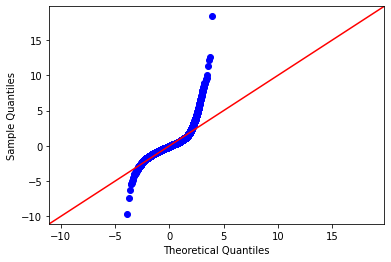

In [59]:
# Create qqplot of new data
fig = sm.graphics.qqplot(model3.resid, dist=stats.norm, line='45', fit=True)


### Well...
That brought it from .602 to .607. Nice!!

### Outlier analysis for price

#### Low End Outliers
The high presence of outliers could mean a few things - you could have easily overlooked homes that sell for way below what they should because of general appearance, *where they are*, their age, or perhaps a certain stigma to the neighborhood or street, or maybe even a stigma to the house itself (is it... *haunted*?). 

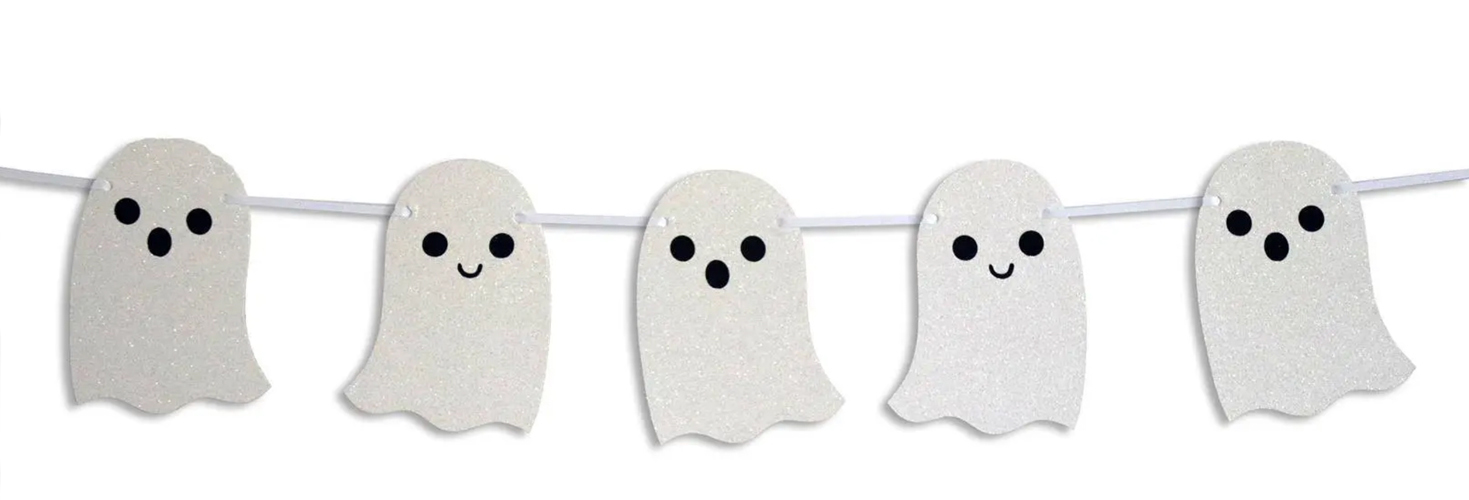
Image Source: etsystatic.com

Spooky!

#### High End Outliers
I could imagine the majority of the outliers on the higher end of the spectrum would have more to do with a certain neighborhood being a **hot** market, perhaps due to location to highways/shops/good schools/low crime. Certain homes might also stick out due to cool features not on this list, like a pool, fireplace, radiant floors, towel warmers, big insulated double hung windows, or even custom koi pond waterfalls. This one is lit, because of course it is.

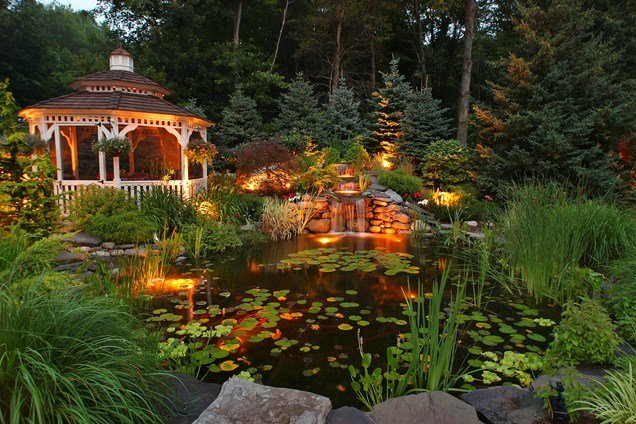

Image Source: freshpatio.com



### Evaluating the score via cross validation of most correlated item


In [60]:
from sklearn.model_selection import cross_val_score
cross_val_score(linreg, X, y)
homes_dum['log_sqft_living'] = np.log10(homes_dum['sqft_living'] + 1)

In [61]:
m_orig = LinearRegression()
scores_orig = cross_val_score(m_orig, homes_dum[['sqft_living']], homes_dum['price'], cv=10)

m_log = LinearRegression()
scores_log = cross_val_score(m_log, homes_dum[['log_sqft_living']], homes_dum['price'], cv=10)

In [62]:
print('R-squared score without log transform: %0.5f (+/- %0.5f)' % (scores_orig.mean(), scores_orig.std()*2))
print('R-squared score with log transform: %0.5f (+/- %0.5f)' % (scores_log.mean(), scores_log.std()*2))

R-squared score without log transform: 0.48929 (+/- 0.03272)
R-squared score with log transform: 0.37271 (+/- 0.04359)


It appears with log transformations, at least with sqft_living, we would actually have a lower R-squared score.

In [63]:
#let's just *take that out, then*
homes_dum = homes_dum.drop(['log_sqft_living'], axis=1)
homes_dum.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_living15', 'mon_sold', 'age',
       'floors_1_0', 'floors_1_5', 'floors_2_5', 'floors_3_0', 'floors_3_5',
       'bathrooms_0_5', 'bathrooms_0_75', 'bathrooms_1_0', 'bathrooms_1_25',
       'bathrooms_1_5', 'bathrooms_1_75', 'bathrooms_2_0', 'bathrooms_2_25',
       'bathrooms_2_5', 'bathrooms_2_75', 'bathrooms_3_0', 'bathrooms_3_25',
       'bathrooms_3_5', 'bathrooms_3_75', 'bathrooms_4_0', 'bathrooms_4_25',
       'bathrooms_4_5', 'bathrooms_4_75', 'bathrooms_5_25', 'bathrooms_5_5',
       'bathrooms_5_75', 'bathrooms_6_0', 'bathrooms_6_25', 'bathrooms_7_5',
       'bathrooms_7_75', 'bathrooms_8_0', 'reno'],
      dtype='object')

## Scaling

Now let's scale the noncategorical columns, and see if they would perform any better. 

In [64]:
hdpre2_scale = preprocessing.StandardScaler().fit(homes_dum[['bedrooms', 'age', 'sqft_living', 'sqft_living15', 'mon_sold']])
homes_std = hdpre2_scale.transform(homes[['bedrooms', 'age', 'sqft_living', 'sqft_living15', 'mon_sold']])


In [65]:
X_sc = homes_std
y_sc = homes_dum['price']

X_int_sc = sm.add_constant(X_sc)
new_model_std = sm.OLS(y_sc,X_int_sc).fit()
new_model_std.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     5321.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:19:35   Log-Likelihood:            -2.9871e+05
No. Observations:               21596   AIC:                         5.974e+05
Df Residuals:                   21590   BIC:                         5.975e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.403e+05   1673.400    322.871      0.000    5.37e+05    5.44e+05
x1         -5.649e+04   2086.718    -27.071      0.000   -6.06e+04   -5.24e+04
x2           7.64e+04   1782.872     42.854      0.000    7.29e+04    7.99e+04
x3          2.734e+05   2935.849     93.128      0.000    2.68e+05    2.79e+05
x4          5.601e+04   2591.419     21.612      0.000    5.09e+04    6.11e+04
x5         -7618.8663   1673.784     -4.552      0.000   -1.09e+04   -4338.125
==============================================================================
Omnibus:                    14816.122   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           601469.502
Skew:                           2.788   Prob(JB):                         0.00
Kurtosis:                      28.245   Cond. No.                         3.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#make a df
homes_std = pd.DataFrame(homes_std)

#Combine the new df with the old categorical items
new_std = pd.concat([homes_std, homes_dum], axis=1)
new_std.columns


Index([               0,                1,                2,                3,
                      4,          'price',       'bedrooms',    'sqft_living',
        'sqft_living15',       'mon_sold',            'age',     'floors_1_0',
           'floors_1_5',     'floors_2_5',     'floors_3_0',     'floors_3_5',
        'bathrooms_0_5', 'bathrooms_0_75',  'bathrooms_1_0', 'bathrooms_1_25',
        'bathrooms_1_5', 'bathrooms_1_75',  'bathrooms_2_0', 'bathrooms_2_25',
        'bathrooms_2_5', 'bathrooms_2_75',  'bathrooms_3_0', 'bathrooms_3_25',
        'bathrooms_3_5', 'bathrooms_3_75',  'bathrooms_4_0', 'bathrooms_4_25',
        'bathrooms_4_5', 'bathrooms_4_75', 'bathrooms_5_25',  'bathrooms_5_5',
       'bathrooms_5_75',  'bathrooms_6_0', 'bathrooms_6_25',  'bathrooms_7_5',
       'bathrooms_7_75',  'bathrooms_8_0',           'reno'],
      dtype='object')

In [67]:
#remove original columns we scaled 
new_std = new_std.drop(['bedrooms', 'age', 'sqft_living', 'sqft_living15', 'mon_sold'], axis=1)
new_std.head()

,0,1,2,3,4,price,floors_1_0,floors_1_5,floors_2_5,floors_3_0,...,bathrooms_4_75,bathrooms_5_25,bathrooms_5_5,bathrooms_5_75,bathrooms_6_0,bathrooms_6_25,bathrooms_7_5,bathrooms_7_75,bathrooms_8_0,reno
0,-0.411272,0.544712,-0.980658,-0.943718,1.099820,221900.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.411272,0.680883,0.533337,-0.432930,1.741863,538000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.517353,1.293654,-1.427232,1.070246,-1.468350,180000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.694809,0.204284,-0.131078,-0.914530,1.741863,604000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.411272,-0.544658,-0.436056,-0.272397,-1.468350,510000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# Go back and create another *new* model with all the scaled features 
X_sc2 = new_std.drop(['price'], axis=1)
y_sc2 = homes_dum['price']

X_int_sc2 = sm.add_constant(X_sc2)
model_s = sm.OLS(y_sc2,X_int_sc2).fit()
model_s.summary()

MissingDataError: exog contains inf or nans

#### Error? 
So we have an error that our data has inf or nans, let's check for both.

In [69]:
#drop then check for nans
new_std.dropna()
new_std.isna().sum()

0                 1
1                 1
2                 1
3                 1
4                 1
price             1
floors_1_0        1
floors_1_5        1
floors_2_5        1
floors_3_0        1
floors_3_5        1
bathrooms_0_5     1
bathrooms_0_75    1
bathrooms_1_0     1
bathrooms_1_25    1
bathrooms_1_5     1
bathrooms_1_75    1
bathrooms_2_0     1
bathrooms_2_25    1
bathrooms_2_5     1
bathrooms_2_75    1
bathrooms_3_0     1
bathrooms_3_25    1
bathrooms_3_5     1
bathrooms_3_75    1
bathrooms_4_0     1
bathrooms_4_25    1
bathrooms_4_5     1
bathrooms_4_75    1
bathrooms_5_25    1
bathrooms_5_5     1
bathrooms_5_75    1
bathrooms_6_0     1
bathrooms_6_25    1
bathrooms_7_5     1
bathrooms_7_75    1
bathrooms_8_0     1
reno              1
dtype: int64

In [70]:
#We cut out the outlier for homes (33 bedrooms), but since we make new_std from homes_std (and homes_std from homes), 
#we didn't take out the outlier there are well
new_std.drop([15856],inplace = True)
new_std

,0,1,2,3,4,price,floors_1_0,floors_1_5,floors_2_5,floors_3_0,...,bathrooms_4_75,bathrooms_5_25,bathrooms_5_5,bathrooms_5_75,bathrooms_6_0,bathrooms_6_25,bathrooms_7_5,bathrooms_7_75,bathrooms_8_0,reno
0,-0.411272,0.544712,-0.980658,-0.943718,1.099820,221900.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.411272,0.680883,0.533337,-0.432930,1.741863,538000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.517353,1.293654,-1.427232,1.070246,-1.468350,180000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.694809,0.204284,-0.131078,-0.914530,1.741863,604000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.411272,-0.544658,-0.436056,-0.272397,-1.468350,510000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.694809,-1.463814,0.250143,-0.228615,-1.468350,360000.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,-1.517353,-1.293600,-1.154931,-1.410724,-0.184265,400000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,-0.411272,-1.123386,-0.523192,-0.841561,-1.789371,402101.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,-1.517353,-1.259557,-1.154931,-1.410724,1.099820,400000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
##There it is! entry 21596 has some Nans! Let's ax it in both!!
homes_dum.drop([21596],inplace = True)
new_std.drop([21596],inplace = True)
new_std.isna().sum()

0                 0
1                 0
2                 0
3                 0
4                 0
price             0
floors_1_0        0
floors_1_5        0
floors_2_5        0
floors_3_0        0
floors_3_5        0
bathrooms_0_5     0
bathrooms_0_75    0
bathrooms_1_0     0
bathrooms_1_25    0
bathrooms_1_5     0
bathrooms_1_75    0
bathrooms_2_0     0
bathrooms_2_25    0
bathrooms_2_5     0
bathrooms_2_75    0
bathrooms_3_0     0
bathrooms_3_25    0
bathrooms_3_5     0
bathrooms_3_75    0
bathrooms_4_0     0
bathrooms_4_25    0
bathrooms_4_5     0
bathrooms_4_75    0
bathrooms_5_25    0
bathrooms_5_5     0
bathrooms_5_75    0
bathrooms_6_0     0
bathrooms_6_25    0
bathrooms_7_5     0
bathrooms_7_75    0
bathrooms_8_0     0
reno              0
dtype: int64

In [72]:
#Now lets try again 

# Go back and create another *new* model with all the scaled features 
X_sc2 = new_std.drop(['price'], axis=1)
y_sc2 = homes_dum['price']

X_int_sc2 = sm.add_constant(X_sc2)
model_s = sm.OLS(y_sc2,X_int_sc2).fit()
model_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     542.6
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:20:00   Log-Likelihood:            -3.0026e+05
No. Observations:               21595   AIC:                         6.006e+05
Df Residuals:                   21557   BIC:                         6.009e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.54e+06   5.33e+04     28.907      0.000    1.44e+06    1.64e+06
0              -4.834e+04   2296.804    -21.045      0.000   -5.28e+04   -4.38e+04
1               8.139e+04   2311.335     35.211      0.000    7.69e+04    8.59e+04
2               9.696e+04   3406.319     28.464      0.000    9.03e+04    1.04e+05
3               6.379e+04   2825.728     22.576      0.000    5.83e+04    6.93e+04
4              -3276.9055   1801.949     -1.819      0.069   -6808.859     255.048
floors_1_0     -4.372e+04   5162.697     -8.469      0.000   -5.38e+04   -3.36e+04
floors_1_5      7652.6193   7954.017      0.962      0.336   -7937.844    2.32e+04
floors_2_5      2.195e+05   2.13e+04     10.324      0.000    1.78e+05    2.61e+05
floors_3_0      3.499e+04   1.13e+04      3.107      0.002    1.29e+04    5.71e+04
floors_3_5        3.3e+05      1e+05      3.294      0.001    1.34e+05    5.26e+05
bathrooms_0_5  -1.262e+06   1.43e+05     -8.843      0.000   -1.54e+06   -9.83e+05
bathrooms_0_75 -1.209e+06   6.23e+04    -19.393      0.000   -1.33e+06   -1.09e+06
bathrooms_1_0  -1.139e+06   5.38e+04    -21.181      0.000   -1.24e+06   -1.03e+06
bathrooms_1_25  -9.27e+05   1.03e+05     -8.992      0.000   -1.13e+06   -7.25e+05
bathrooms_1_5   -1.08e+06   5.39e+04    -20.039      0.000   -1.19e+06   -9.74e+05
bathrooms_1_75 -1.046e+06   5.36e+04    -19.498      0.000   -1.15e+06   -9.41e+05
bathrooms_2_0  -1.049e+06   5.37e+04    -19.528      0.000   -1.15e+06   -9.44e+05
bathrooms_2_25 -9.871e+05   5.36e+04    -18.425      0.000   -1.09e+06   -8.82e+05
bathrooms_2_5   -9.77e+05   5.33e+04    -18.323      0.000   -1.08e+06   -8.73e+05
bathrooms_2_75 -8.974e+05   5.37e+04    -16.703      0.000      -1e+06   -7.92e+05
bathrooms_3_0   -8.67e+05    5.4e+04    -16.053      0.000   -9.73e+05   -7.61e+05
bathrooms_3_25 -6.507e+05   5.42e+04    -12.010      0.000   -7.57e+05   -5.45e+05
bathrooms_3_5   -6.72e+05    5.4e+04    -12.455      0.000   -7.78e+05   -5.66e+05
bathrooms_3_75 -4.657e+05   5.71e+04     -8.154      0.000   -5.78e+05   -3.54e+05
bathrooms_4_0  -4.175e+05   5.77e+04     -7.239      0.000   -5.31e+05   -3.04e+05
bathrooms_4_25 -2.161e+05   6.08e+04     -3.557      0.000   -3.35e+05    -9.7e+04
bathrooms_4_5  -3.608e+05   5.92e+04     -6.095      0.000   -4.77e+05   -2.45e+05
bathrooms_4_75  2.058e+05   7.65e+04      2.691      0.007    5.59e+04    3.56e+05
bathrooms_5_25  1.416e+05   9.05e+04      1.564      0.118   -3.58e+04    3.19e+05
bathrooms_5_5   6.058e+05   9.91e+04      6.114      0.000    4.12e+05       8e+05
bathrooms_5_75  5.981e+05   1.43e+05      4.195      0.000    3.19e+05    8.78e+05
bathrooms_6_0   1.208e+06    1.2e+05     10.046      0.000    9.73e+05    1.44e+06
bathrooms_6_25  1.193e+06   1.94e+05      6.133      0.000    8.11e+05    1.57e+06
bathrooms_7_

### Analysis
All that fussing to only end up with a substantially poor Adjusted R-squared value of .481. It seems our baseline plus outlier removal is still reigning supreme at .607. Let's try one more thing. 

# Pivot - Dummies vs. Not Dummies (and focusing on core correlated items)
Let's try something else to improve our model! Let's narrow down only the top 3 correlated items and run it into a model to see if it makes a difference.

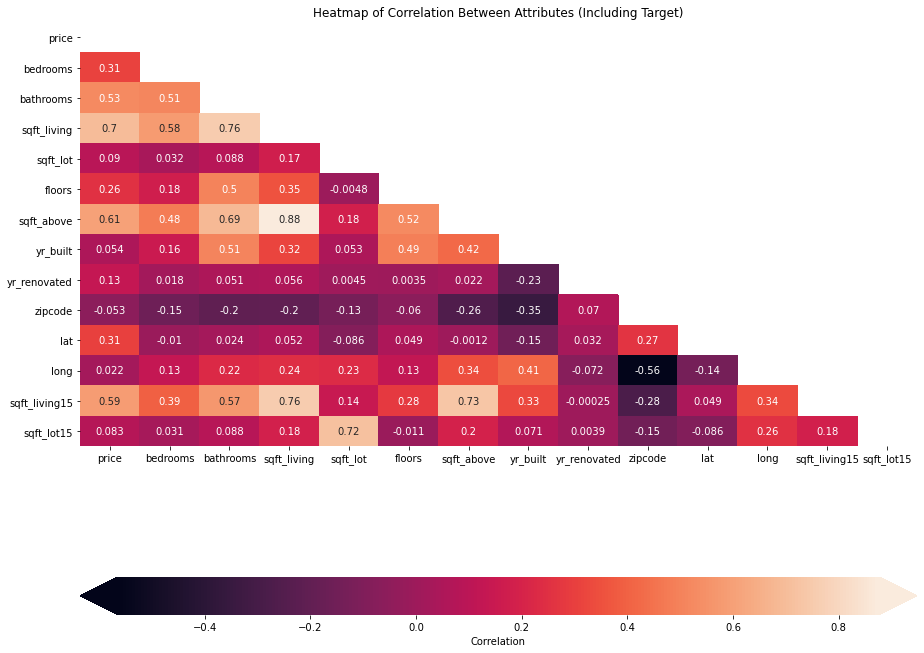

In [73]:
# Heatmap of correlations as a reminder
corr = df.corr()

# Set up figure and axes wih a fig size that's easy to read
fig, ax = plt.subplots(figsize=(15, 12))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [74]:
# let's go with just sqft_living (.7, our most correlated feature) to make our simple baseline
homes_notdums =pd.DataFrame(df, columns = ["price", "sqft_living"])
homes_notdums.head()

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680


In [75]:
#Baseline Model of price vs sqft_living
outcome = 'price'
x_cols_nd = ["sqft_living"]

# Create the predictors object to be used in the OLS model
predictors = '+'.join(x_cols_nd)
# Name the formula to create our model
formula = outcome + '~' + predictors
# Create our linear regression model
modelb = ols(formula=formula, data=homes_notdums).fit()
# Call summary to return data on model
modelb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:20:26   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Not a promising start, but let's add in some more data. 

In [76]:
# let's go with sqft_living (.7), bathrooms (.53), and bedrooms (.31). 
#We are going to ignore sqft_above and sqft_living15 because they are so closely correlated with each other.
homes_notdums =pd.DataFrame(df, columns = ["price","bedrooms","bathrooms","sqft_living"])
#take out the home with the 33 bedrooms 
homes_notdums.drop([15856],inplace = True)
homes_notdums.head()

,price,bedrooms,bathrooms,sqft_living
0,221900.0,3,1.00,1180
1,538000.0,3,2.25,2570
2,180000.0,2,1.00,770
3,604000.0,4,3.00,1960
4,510000.0,3,2.00,1680


### Axing outliers

Let's focus on axing outliers for bedrooms and bathrooms. 

In [77]:
# Calculate the z_scores of bedrooms with stats library
from scipy.stats import zscore
df_bed_nd=homes_notdums[['bedrooms']].copy()
z_scores = df_bed_nd.apply(zscore)

# Get the absolute z-scores
abs_z_scores = np.abs(z_scores)

# Filter in values that are within the 3rd standard deviation
filtered_entries = (abs_z_scores < 3).all(axis=1)
homes_notdums = homes_notdums[filtered_entries]

Let's do the same with bathrooms.

In [78]:
# Calculate the z_scores of bathrooms with stats library
from scipy.stats import zscore
df_bath_nd=homes_notdums[['bathrooms']].copy()
z_scores = df_bath_nd.apply(zscore)

# Get the absolute z-scores
abs_z_scores2 = np.abs(z_scores)

# Filter in values that are within the 3rd standard deviation
filtered_entries = (abs_z_scores2 < 3).all(axis=1)
homes_notdums = homes_notdums[filtered_entries]

Now axed, let's move on to improving our model by making a test/train set 

In [79]:
# import statsmodels library
import statsmodels.api as sm

# create predictors
predictors = homes_notdums.drop(['price'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model_nd = sm.OLS(homes_notdums['price'],predictors_int).fit()

In [80]:
# Create X and y
y = homes_notdums[['price']]
X = homes_notdums.drop(['price'], axis=1)

In [81]:
# Create train and test datasets from homes_notdum with an 80% train, 20% test ratio, check sizes
X_train_nd, X_test_nd, y_train_nd, y_test_nd = train_test_split(X, y, test_size=0.2)
print(len(X_train_nd), len(X_test_nd), len(y_train_nd), len(y_test_nd))

17090 4273 17090 4273


### Linear Regression

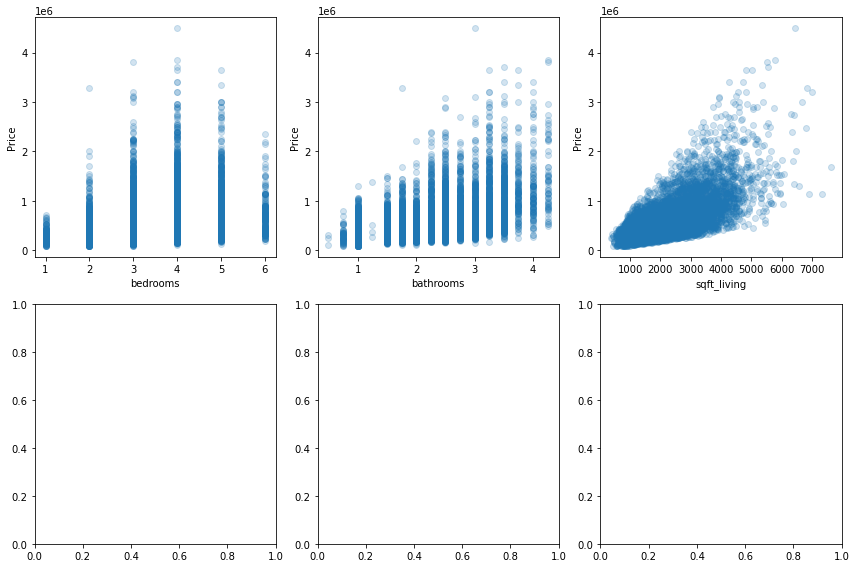

In [82]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(X_train_nd.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train_nd[col], y_train_nd, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("Price")

In [83]:
linreg = LinearRegression()
# Fit to our training data
linreg.fit(X_train_nd, y_train_nd)

y_hat_train_nd = linreg.predict(X_train_nd)
y_hat_test_nd = linreg.predict(X_test_nd)

In [84]:
# Create train & test residuals
train_res_nd = y_hat_train_nd - y_train_nd
test_res_nd = y_hat_test_nd - y_test_nd
print("train:", train_res_nd)
print("test:", test_res_nd)

train:                price
3068   -10809.843327
14000 -406165.462617
2181   219958.197933
9801   -84036.193760
6789   -44733.416765
...              ...
16788   19007.361299
9844    24920.039379
16787   75408.730426
3673    77972.892093
1683    53680.625028

[17090 rows x 1 columns]
test:                price
15102  -11096.415537
1049    37598.457271
16967   16968.107217
3733  -156692.527591
17908  165117.536548
...              ...
11229   89745.101818
12147  142336.507498
16347  168442.794801
17271 -119607.734909
5275  -136705.107764

[4273 rows x 1 columns]


Again, residuals are the difference between the actual value and the predicted value. We can see that there is pretty big difference between many of the predicted values and the actual values, some equalling well over $100,000.

In [85]:
# Compute MSE for train and test set
train_mse_nd = np.sum((y_train_nd-y_hat_train_nd)**2)/len(y_train_nd)
test_mse_nd = np.sum((y_test_nd-y_hat_test_nd)**2)/len(y_test_nd)

print('Train Mean Squared Error: ', train_mse_nd)
print('Test Mean Squared Error: ', test_mse_nd)

Train Mean Squared Error:  price    5.654915e+10
dtype: float64
Test Mean Squared Error:  price    5.949136e+10
dtype: float64


* The mean squared error (MSE) tells you how close a regression line is to a set of points. 
* The MSE is still pretty high

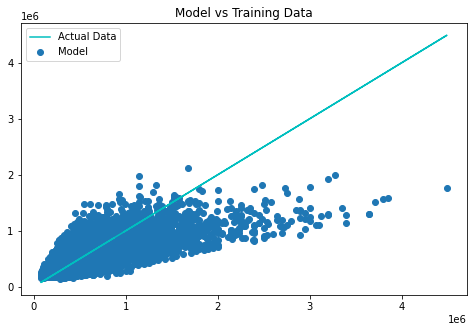

In [86]:
# Create a matplotlib plot for Model vs Training Data
plt.figure(figsize=(8, 5))
# Create a scatterplot on the figure of y-train
plt.scatter(y_train_nd, y_hat_train_nd, label='Model')
# Plot y_hat_train
plt.plot(y_train_nd, y_train_nd, label='Actual Data', color='c')
plt.title('Model vs Training Data')
plt.legend()

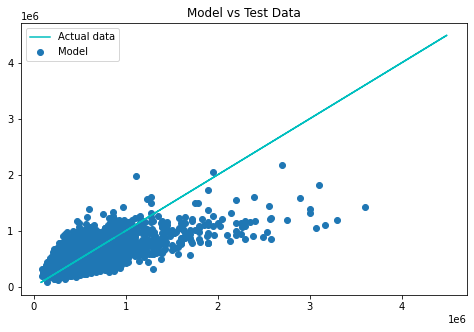

In [87]:
# Create a matplotlib figure for Model vs Test Data
plt.figure(figsize=(8, 5))
# Create a scatter plot
plt.scatter(y_test_nd, y_hat_test_nd, label='Model')
plt.plot(y_train_nd, y_train_nd, label='Actual data', color='c')
plt.title('Model vs Test Data')
plt.legend()

Overall, it looks a little similar to our baseline, since there is an overall generality to the data and how it changes, but there are a lot of outliers and extremes to contend with. Let's axe the bedroom outliers like we did with dummies.

In [88]:
outcome = 'price'
x_cols_nd = ["bedrooms","bathrooms","sqft_living"]

# Create the predictors object to be used in the OLS model
predictors = '+'.join(x_cols_nd)
# Name the formula to create our model
formula = outcome + '~' + predictors
# Create our linear regression model
model_notdums = ols(formula=formula, data=homes_notdums).fit()
# Call summary to return data on model
model_notdums.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     6414.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:21:09   Log-Likelihood:            -2.9488e+05
No. Observations:               21363   AIC:                         5.898e+05
Df Residuals:                   21359   BIC:                         5.898e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.169e+05   6861.411     17.036      0.000    1.03e+05     1.3e+05
bedrooms    -5.776e+04   2365.015    -24.425      0.000   -6.24e+04   -5.31e+04
bathrooms    4614.4870   3356.801      1.375      0.169   -1965.094    1.12e+04
sqft_living   290.5435      3.001     96.821      0.000     284.662     296.425
==============================================================================
Omnibus:                    11019.015   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148177.189
Skew:                           2.166   Prob(JB):                         0.00
Kurtosis:                      15.153   Cond. No.                     9.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
#Here we have the coefficients and intercept for the notdums model that will give us a better idea
#of how much each items affects the price
#make a series of the info we need
info_nd = model_notdums.params
#convert to dataframe
info_nd = pd.DataFrame(info_nd)
#convert to int64 to suppress scientiffic notation
info_nd = info_nd.astype('int64')
#See result
info_nd

,0
Intercept,116892
bedrooms,-57764
bathrooms,4614
sqft_living,290


What this means is that for each bedroom added, the base price of a home would actually decrease by 57,764 USD. Meanwhile, adding in an additional bathroom or adding an extra square foot of living space will bring you in 4,614 USD and 290 USD, repectively. 

### Multicollinearity Factor
Let's check for this models Multicollinearity factor - if it is at or above 5, it is considered that they are high level of multicollinearity.

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_nd.values, i) for i in range(X_train_nd.shape[1])]
pd.Series(vif, index=X_train_nd.columns, name="Variance Inflation Factor")

bedrooms       13.448422
bathrooms      18.637042
sqft_living    16.113367
Name: Variance Inflation Factor, dtype: float64

Yes, they are *WAY* above what is considered high for multicolinearity. 

#### R^2 was lowered when adding in additional highly price-correlated features, but we are still significantly lower than our baseline (dummy-laden) model! 
Let's compare the R^2 values, and F-tests of the dums vs not dums. 

In [91]:
print("Dums Adjusted R^2 (without scaling): ", model3.rsquared_adj)
print("Non-Dums Adjusted R^2: ", model_notdums.rsquared_adj)

print("   ")
print("Dums F-stat (without scaling): ", model3.fvalue)
print("Non-Dums F-stat: ", model_notdums.fvalue)
print("   ")
print("Dums Prob (F-statistic) (without scaling): ", model3.f_pvalue)
print("Non-Dums Prob (F-statistic): ", model_notdums.f_pvalue)

Dums Adjusted R^2 (without scaling):  0.6073159863071422
Non-Dums Adjusted R^2:  0.47386091201091407
   
Dums F-stat (without scaling):  926.1106907215809
Non-Dums F-stat:  6414.143744344603
   
Dums Prob (F-statistic) (without scaling):  0.0
Non-Dums Prob (F-statistic):  0.0


### Essentially...
The dums (without the scaling attempt) came out with an adjusted r^2 value of .607 which exxplains 60.7% of the data by the model, while the straight up non-dums with the top 3 correlated values came out to only .508, or able to explain only 50.8% of the data. 

When we look at the f-statistic and the Prob (F-Statistic), you can see the F-stat is high and zero for both, meaning that we can reject the null hypothesis and understand that these factors would affect the price to a substantial degree. However, the high amount of outliers in prices would indicate that there are other factors at work that we can't take into account here. 

Looking back at our dummies model, let's take a look at the MSE and analyze the model.

### Interpret the Final (Dummies) Model

In [92]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     926.1
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:22:02   Log-Likelihood:            -2.9630e+05
No. Observations:               21535   AIC:                         5.927e+05
Df Residuals:                   21498   BIC:                         5.930e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        5.66e+05   5.04e+04     11.240      0.000    4.67e+05    6.65e+05
bedrooms       -5.559e+04   2317.031    -23.993      0.000   -6.01e+04   -5.11e+04
sqft_living      219.4901      3.641     60.280      0.000     212.353     226.627
sqft_living15    113.8956      3.627     31.398      0.000     106.785     121.006
mon_sold       -2602.6676    501.112     -5.194      0.000   -3584.884   -1620.451
age             3015.8960     78.087     38.622      0.000    2862.841    3168.951
floors_1_0     -3.759e+04   4559.936     -8.243      0.000   -4.65e+04   -2.86e+04
floors_1_5     -1.966e+04   7230.123     -2.719      0.007   -3.38e+04   -5488.501
floors_2_5      1.253e+05   1.87e+04      6.699      0.000    8.86e+04    1.62e+05
floors_3_0      1.987e+05   9972.048     19.923      0.000    1.79e+05    2.18e+05
floors_3_5      2.013e+05   9.36e+04      2.151      0.031    1.79e+04    3.85e+05
bathrooms_0_5  -8.043e+05   1.25e+05     -6.455      0.000   -1.05e+06    -5.6e+05
bathrooms_0_75 -6.973e+05   5.66e+04    -12.329      0.000   -8.08e+05   -5.86e+05
bathrooms_1_0  -6.613e+05   4.95e+04    -13.368      0.000   -7.58e+05   -5.64e+05
bathrooms_1_25 -4.562e+05   9.07e+04     -5.032      0.000   -6.34e+05   -2.79e+05
bathrooms_1_5  -6.436e+05   4.94e+04    -13.039      0.000    -7.4e+05   -5.47e+05
bathrooms_1_75 -6.461e+05    4.9e+04    -13.173      0.000   -7.42e+05    -5.5e+05
bathrooms_2_0   -6.43e+05   4.91e+04    -13.094      0.000   -7.39e+05   -5.47e+05
bathrooms_2_25 -6.239e+05   4.89e+04    -12.764      0.000    -7.2e+05   -5.28e+05
bathrooms_2_5  -6.508e+05   4.86e+04    -13.398      0.000   -7.46e+05   -5.56e+05
bathrooms_2_75 -6.247e+05   4.88e+04    -12.795      0.000    -7.2e+05   -5.29e+05
bathrooms_3_0   -5.92e+05    4.9e+04    -12.072      0.000   -6.88e+05   -4.96e+05
bathrooms_3_25 -4.656e+05   4.91e+04     -9.493      0.000   -5.62e+05   -3.69e+05
bathrooms_3_5  -5.171e+05   4.88e+04    -10.594      0.000   -6.13e+05   -4.21e+05
bathrooms_3_75  -3.59e+05   5.14e+04     -6.981      0.000    -4.6e+05   -2.58e+05
bathrooms_4_0  -3.816e+05    5.2e+04     -7.336      0.000   -4.84e+05    -2.8e+05
bathrooms_4_25 -2.633e+05   5.45e+04     -4.835      0.000    -3.7e+05   -1.57e+05
bathrooms_4_5   -3.54e+05   5.33e+04     -6.645      0.000   -4.58e+05    -2.5e+05
bathrooms_4_75  9.977e+04   6.91e+04      1.443      0.149   -3.57e+04    2.35e+05
bathrooms_5_25  5.494e+04   8.15e+04      0.674      0.500   -1.05e+05    2.15e+05
bathrooms_5_5   4.828e+05   9.01e+04      5.359      0.000    3.06e+05    6.59e+05
bathrooms_5_75  7.013e+05   1.41e+05      4.977      0.000    4.25e+05    9.78e+05
bathrooms_6_0   8.443e+05   1.13e+05      7.471      0.000    6.23e+05    1.07e+06
bathrooms_6_25  4.231e+05   1.69e+05      2.504      0.012    9.18e+04    7.54e+05
bathrooms_7_

In [93]:
# Computing MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, model3.predict(X_test), squared=False)

224583.5809123635

This means that, given the average house sales price, this algorithm will be off by about $224,583.58, possibly due to other factors not taken into consideration here. 

### Multicollinearity Factor
Let's check this final model for Multicollinearity factor - if it is at or above 5, it is considered that they are high level of multicollinearity.

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.Series(vif, index=X_train.columns, name="Variance Inflation Factor")

bedrooms          1.687924
sqft_living       4.586066
sqft_living15     2.536626
mon_sold          1.002250
age               2.164209
floors_1_0             inf
floors_1_5             inf
floors_2_0             inf
floors_2_5             inf
floors_3_0             inf
floors_3_5             inf
bathrooms_0_5          inf
bathrooms_0_75         inf
bathrooms_1_0          inf
bathrooms_1_25         inf
bathrooms_1_5          inf
bathrooms_1_75         inf
bathrooms_2_0          inf
bathrooms_2_25         inf
bathrooms_2_5          inf
bathrooms_2_75         inf
bathrooms_3_0          inf
bathrooms_3_25         inf
bathrooms_3_5          inf
bathrooms_3_75         inf
bathrooms_4_0          inf
bathrooms_4_25         inf
bathrooms_4_5          inf
bathrooms_4_75         inf
bathrooms_5_0          inf
bathrooms_5_25         inf
bathrooms_5_5          inf
bathrooms_5_75         inf
bathrooms_6_0          inf
bathrooms_6_25         inf
bathrooms_6_5          inf
bathrooms_6_75         inf
b

Yes, most are *WAY* above what is considered high for multicolinearity, though it's interesting that some bathrooms, floors, and reno have all come out as being pretty low. 

In [95]:
#Here we have the coefficients and intercept for the final model:
#make a series of the info we need
info_needed = model3.params
#convert to dataframe
info_needed = pd.DataFrame(info_needed)
#convert to int64 to suppress scientiffic notation
info_needed = info_needed.astype('int64')
#See result
info_needed

,0
Intercept,565997
bedrooms,-55591
sqft_living,219
sqft_living15,113
mon_sold,-2602
age,3015
floors_1_0,-37585
floors_1_5,-19660
floors_2_5,125260
floors_3_0,198676


### Analysis

According to our model, a base price for a home is 565,997USD. Each additional year of age that a home has will increase it's value by 3015USD. Each additional bedroom will decrease that value by an additional 55,591 USD. Renovations will net you about 61,958 USD, but the data doesn't go into what kind of renovation was done.

While I appreciate how the dummies seperate the bathrooms to allow us to see how the price would fluctuate based on how a certain number of bathrooms would affect the price (given that nothing else about the property have changed), but this limits my ability to really get a clear amount of difference it would make for the numbers we axed when we took out elements with pvalues above .05. Furthermore, I find it very curious that certain bathroom amounts result in such wildly different rates - for example, somehow having a property with 4.5 bathrooms would be worth 354,037USD less than your baseline, while if the same exact property had 5.5 bathrooms, it would be worth a whopping 482,823USD **more**. 

I noticed that the bathrooms seem to be about the same amount on the lower end, give or take a few thousand, which could demonstrate that on the lower end, the value increase could be a couple thousand dollars, which would partially agree with out non-dummies model.  

### Overall
While I like the simplicty of not using dummies, using dummies proved to produce a model with a higher adj. r^2 than the non-dummies model. In the future, I think I will continue to use dummies, and try out other models that would take other factors into consideration from the data - namely zip code, grade, and possibly lat/long. 



# Part 4: Recommendations

### When buying:

Look for undervalued homes with the most sqft living space that you can afford, especially with neighbors with big homes. Carefully consider how many bathrooms the house has, and if there is room to install another bathroom or expand a small bathroom (think .25/.5/.75 to a full 1 bath). Consider searching to buy in the colder months when prices are lower, specifically late Autumn (November) and winter (December thru January) as home prices generally skew lower then.

### Before selling:
If you do not intend on expanding the living area of a home and cannot add any more bathrooms, it is advisable to renovate what you do have by upgrading features, appliances, and fixtures. 

### When selling:
When you are looking to sell for the most, keep in mind that you would actually want to list in early Spring (March), or mid to late summer (July and August), as most homes sell for higher in the Spring/early Summer and very late Summer/early Autumn. 

